<a href="https://colab.research.google.com/github/KatieMears628/death-classification/blob/main/5Final_Project_Working_Document.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ADS 502 Final Project - Death Classification**
### Team 5 - Katie Mears, Marvin Moran, Claire Bentzen

## 1. Introduction

##### Load Packages

In [160]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import random
import numpy as np
from sklearn.preprocessing import MinMaxScaler
!pip install prince
import prince
from scipy.stats import chi2_contingency
import networkx as nx
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dropout
import tensorflow as tf
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score, roc_curve


In [161]:
import warnings
warnings.filterwarnings('ignore')

##### Read and Examine Dataset

In [299]:
# Read in 2015_data.csv
death_data = pd.read_csv('/content/2015_data.csv')

# Display the first few rows of the data
print(death_data.head())

   resident_status  education_1989_revision  education_2003_revision  \
0                1                      NaN                      3.0   
1                1                      NaN                      6.0   
2                1                      NaN                      3.0   
3                1                      NaN                      3.0   
4                1                      NaN                      5.0   

   education_reporting_flag  month_of_death sex  detail_age_type  detail_age  \
0                         1               1   M                1          84   
1                         1               1   M                1          70   
2                         1               1   F                1          91   
3                         1               1   F                1          40   
4                         1               1   F                1          89   

   age_substitution_flag  age_recode_52  ...  record_condition_18  \
0                

In [300]:
# Print shape of data
print(death_data.shape)
total = death_data.shape[0]

(2718198, 77)


In [301]:
# Print Column Titles in Original Data Set
column_titles = death_data.columns
print(column_titles)

Index(['resident_status', 'education_1989_revision', 'education_2003_revision',
       'education_reporting_flag', 'month_of_death', 'sex', 'detail_age_type',
       'detail_age', 'age_substitution_flag', 'age_recode_52', 'age_recode_27',
       'age_recode_12', 'infant_age_recode_22',
       'place_of_death_and_decedents_status', 'marital_status',
       'day_of_week_of_death', 'current_data_year', 'injury_at_work',
       'manner_of_death', 'method_of_disposition', 'autopsy', 'activity_code',
       'place_of_injury_for_causes_w00_y34_except_y06_and_y07_',
       'icd_code_10th_revision', '358_cause_recode', '113_cause_recode',
       '130_infant_cause_recode', '39_cause_recode',
       'number_of_entity_axis_conditions', 'entity_condition_1',
       'entity_condition_2', 'entity_condition_3', 'entity_condition_4',
       'entity_condition_5', 'entity_condition_6', 'entity_condition_7',
       'entity_condition_8', 'entity_condition_9', 'entity_condition_10',
       'entity_condition

## 2. Feature Selection

In [302]:
# Print Missing Values per Column
missing_values_count = death_data.isnull().sum()
print(missing_values_count)

resident_status                     0
education_1989_revision       2645155
education_2003_revision         73043
education_reporting_flag            0
month_of_death                      0
                               ...   
race_imputation_flag          2692049
race_recode_3                       0
race_recode_5                       0
hispanic_origin                     0
hispanic_originrace_recode          0
Length: 77, dtype: int64


In [303]:
# Print Missing Data as percentage (per column)
total_rows = death_data.shape[0]
percent_missing = (missing_values_count / total_rows) * 100
print(percent_missing)

resident_status                0.000000
education_1989_revision       97.312815
education_2003_revision        2.687185
education_reporting_flag       0.000000
month_of_death                 0.000000
                                ...    
race_imputation_flag          99.038002
race_recode_3                  0.000000
race_recode_5                  0.000000
hispanic_origin                0.000000
hispanic_originrace_recode     0.000000
Length: 77, dtype: float64


In [304]:
# Print Total Percent of Missing Data
total_missing_values = death_data.isnull().sum().sum()
total_elements = death_data.size
total_percent_missing = (total_missing_values / total_elements) * 100
print("Total percentage of missing data in the dataset: {:.2f}%".format(total_percent_missing))

Total percentage of missing data in the dataset: 54.43%


Due to the amount of missing data in certain columns, those columns will be dropped.

In [305]:
# Isolate the Desired Columns
desired_columns = ['education_2003_revision', 'month_of_death', 'sex', 'place_of_death_and_decedents_status',
                   'marital_status', 'day_of_week_of_death', 'injury_at_work', 'manner_of_death', 'method_of_disposition',
                   'autopsy', 'race','detail_age']
new_death = death_data[desired_columns]

# List of column names to convert to categorical
categorical_columns = ['education_2003_revision', 'month_of_death', 'sex', 'place_of_death_and_decedents_status',
                   'marital_status', 'day_of_week_of_death', 'injury_at_work', 'manner_of_death',
                   'method_of_disposition', 'autopsy', 'race']

# Convert the selected columns to categorical
new_death[categorical_columns] = new_death[categorical_columns].astype('category')

In [306]:
# Data Description of original data set with selected columns (2015_data.csv)
data_description_all = new_death.describe(include='all')
print(data_description_all)

        education_2003_revision  month_of_death      sex  \
count                 2645155.0       2718198.0  2718198   
unique                      9.0            12.0        2   
top                         3.0             1.0        M   
freq                  1077604.0        265882.0  1377165   
mean                        NaN             NaN      NaN   
std                         NaN             NaN      NaN   
min                         NaN             NaN      NaN   
25%                         NaN             NaN      NaN   
50%                         NaN             NaN      NaN   
75%                         NaN             NaN      NaN   
max                         NaN             NaN      NaN   

        place_of_death_and_decedents_status marital_status  \
count                             2718198.0        2718198   
unique                                  8.0              5   
top                                     1.0              M   
freq                           

##### Convert response variable to only 2 categories - 0 for not homicide and 1 for homicide

In [307]:
# Remove rows where manner_of_death is not determined
new_death = new_death[new_death['manner_of_death'] != 5]

# Convert manner_of_death to homicide or not homicide
new_death['manner_of_death'] = new_death['manner_of_death'].replace([1, 2, 4, 5, 6, 7, None],0)
new_death['manner_of_death'] = new_death['manner_of_death'].replace([3],1)

## 3. Exploratory Data Analysis (Original Data Set)

In [308]:
# Get the data types for all columns
data_types = new_death.dtypes

print(data_types)

education_2003_revision                category
month_of_death                         category
sex                                    category
place_of_death_and_decedents_status    category
marital_status                         category
day_of_week_of_death                   category
injury_at_work                         category
manner_of_death                        category
method_of_disposition                  category
autopsy                                category
race                                   category
detail_age                                int64
dtype: object


#### 3.1 Identify Missing Values + Duplicate Data

Remaining Missing Values

In [309]:
# Print Missing Values per Column
missing_values_count = new_death.isnull().sum()
print(missing_values_count)

education_2003_revision                 72610
month_of_death                              0
sex                                         0
place_of_death_and_decedents_status         0
marital_status                              0
day_of_week_of_death                        0
injury_at_work                              0
manner_of_death                        388364
method_of_disposition                       0
autopsy                                     0
race                                        0
detail_age                                  0
dtype: int64


In [310]:
# Print Missing Data as percentage (per column)
total_rows = new_death.shape[0]
percent_missing = (missing_values_count / total_rows) * 100
print(percent_missing)

education_2003_revision                 2.682162
month_of_death                          0.000000
sex                                     0.000000
place_of_death_and_decedents_status     0.000000
marital_status                          0.000000
day_of_week_of_death                    0.000000
injury_at_work                          0.000000
manner_of_death                        14.345894
method_of_disposition                   0.000000
autopsy                                 0.000000
race                                    0.000000
detail_age                              0.000000
dtype: float64


In [311]:
# Print Total Percent of Missing Data
total_missing_values = new_death.isnull().sum().sum()
total_elements = new_death.size
total_percent_missing = (total_missing_values / total_elements) * 100
print("Total percentage of missing data in the dataset: {:.2f}%".format(total_percent_missing))

Total percentage of missing data in the dataset: 1.42%


Duplicate Data


In [312]:
# Identify duplicate rows based on all columns
duplicate_rows = new_death[new_death.duplicated()]

# Count the number of duplicated rows
num_duplicates = new_death.duplicated().sum()
print("Number of Duplicated Rows:", num_duplicates)

Number of Duplicated Rows: 823024


In [442]:
# Calculate the percentage of duplicated rows
percentage_duplicates = (num_duplicates / total_rows) * 100

# Print the results
print("Number of Duplicated Rows:", num_duplicates)
print("Percentage of Duplicated Rows: {:.2f}%".format(percentage_duplicates))

Number of Duplicated Rows: 823024
Percentage of Duplicated Rows: 30.40%


In [313]:
# Keep the first occurrence and remove subsequent duplicates
new_death_drop = new_death.drop_duplicates()
print(new_death_drop)

        education_2003_revision month_of_death sex  \
0                           3.0              1   M   
1                           6.0              1   M   
2                           3.0              1   F   
3                           3.0              1   F   
4                           5.0              1   F   
...                         ...            ...  ..   
2718193                     1.0              5   M   
2718194                     9.0             12   F   
2718195                     9.0             12   M   
2718196                     9.0              7   M   
2718197                     9.0             12   M   

        place_of_death_and_decedents_status marital_status  \
0                                         1              M   
1                                         1              M   
2                                         4              W   
3                                         4              S   
4                                        

In [314]:
num_rows, num_columns = new_death_drop.shape
print(num_rows, num_columns)

1884120 12


In [315]:
# Data description
data_description = new_death_drop.describe(include='all')

# Data types of columns
data_types = new_death_drop.dtypes

# Missing values
missing_values = new_death_drop.isnull().sum()

In [316]:
# Print the description after dropping duplicates
print("Number of Rows:", num_rows)
print("Number of Columns:", num_columns)
print("\nData Description:\n", data_description)
print("\nData Types:\n", data_types)
print("\nMissing Values:\n", missing_values)
print("\nKey Insights:\n", "See above output.")

Number of Rows: 1884120
Number of Columns: 12

Data Description:
         education_2003_revision  month_of_death      sex  \
count                 1826088.0       1884120.0  1884120   
unique                      9.0            12.0        2   
top                         3.0             1.0        M   
freq                   586450.0        174183.0   997017   
mean                        NaN             NaN      NaN   
std                         NaN             NaN      NaN   
min                         NaN             NaN      NaN   
25%                         NaN             NaN      NaN   
50%                         NaN             NaN      NaN   
75%                         NaN             NaN      NaN   
max                         NaN             NaN      NaN   

        place_of_death_and_decedents_status marital_status  \
count                             1884120.0        1884120   
unique                                  8.0              5   
top                        

In [317]:
new_death_drop = new_death

#### 3.2 Categorical Data Analysis

##### 3.2.1 education_2003_revision

education_2003_revision Frequency:
3.0    1074192
4.0     314183
1.0     287827
2.0     277727
6.0     260498
5.0     153823
9.0     118901
7.0     103782
8.0      43601
Name: education_2003_revision, dtype: int64


[Text(0, 0, '8th grade or less'),
 Text(1, 0, '9 - 12th grade, No Diploma'),
 Text(2, 0, 'HS/GED'),
 Text(3, 0, 'Some College'),
 Text(4, 0, 'Associate Degree'),
 Text(5, 0, "Bachelor's Degree"),
 Text(6, 0, "Master's Degree"),
 Text(7, 0, 'Doctorate or Professional Degree'),
 Text(8, 0, 'Unknown')]

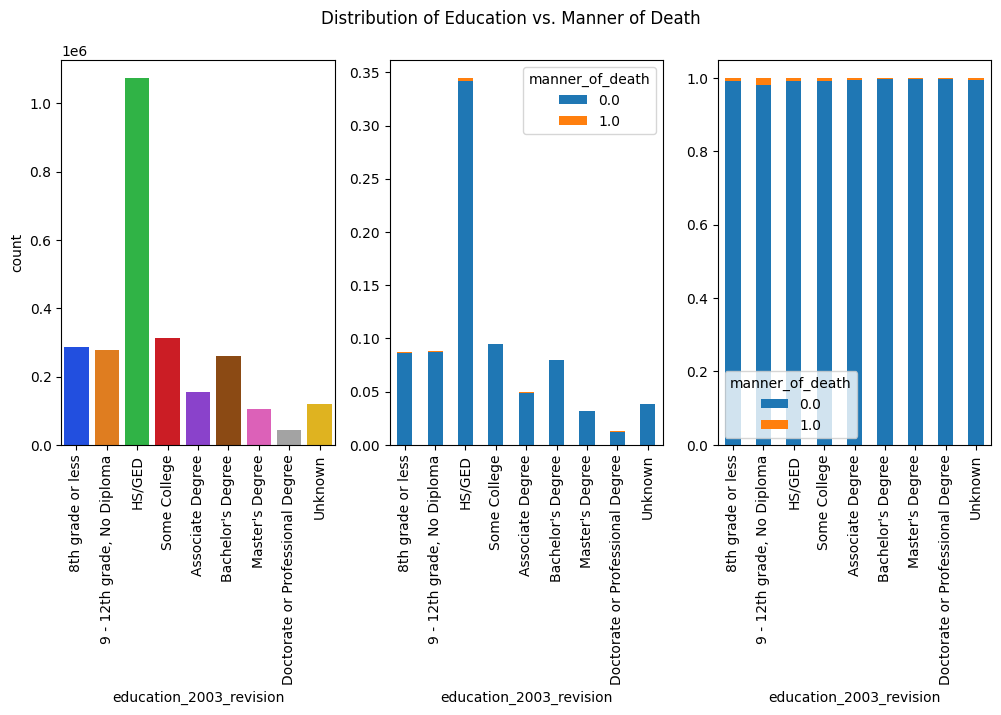

In [318]:
# Value Counts
education_counts = new_death['education_2003_revision'].value_counts()
print("education_2003_revision Frequency:")
print(education_counts)

# Set Up Plot Configuration
fig, axs = plt.subplots(1, 3, figsize=(12, 5))
fig.suptitle("Distribution of Education vs. Manner of Death")

# Plot Counts
sns.countplot(x="education_2003_revision", data=new_death, ax=axs[0], palette = "bright")
labels = ["8th grade or less", "9 - 12th grade, No Diploma", "HS/GED", "Some College", "Associate Degree", "Bachelor's Degree", "Master's Degree", "Doctorate or Professional Degree", "Unknown"]
axs[0].set_xticks(range(len(labels)))
axs[0].set_xticklabels(labels, rotation=90)

# Plot Counts with Overlay
crosstab_education = pd.crosstab(new_death['education_2003_revision'], new_death['manner_of_death']) / total
crosstab_education.plot(kind='bar', ax=axs[1], stacked = True)
axs[1].set_xticks(range(len(labels)))
axs[1].set_xticklabels(labels, rotation=90)

# Plot Counts with Overlay and Normalization
crosstab_education_norm = crosstab_education.div(crosstab_education.sum(axis=1), axis = 0)
crosstab_education_norm.plot(kind='bar', ax=axs[2], stacked = True)
axs[2].set_xticks(range(len(labels)))
axs[2].set_xticklabels(labels, rotation=90)

##### 3.2.2 month_of_death

month_of_death Frequency:
1     264880
3     242236
12    233386
2     226594
4     223953
10    223077
5     223023
11    219398
7     216488
8     213979
6     210704
9     209426
Name: month_of_death, dtype: int64


[Text(0, 0, 'Jan'),
 Text(1, 0, 'Feb'),
 Text(2, 0, 'Mar'),
 Text(3, 0, 'Apr'),
 Text(4, 0, 'May'),
 Text(5, 0, 'Jun'),
 Text(6, 0, 'Jul'),
 Text(7, 0, 'Aug'),
 Text(8, 0, 'Sep'),
 Text(9, 0, 'Oct'),
 Text(10, 0, 'Nov'),
 Text(11, 0, 'Dec')]

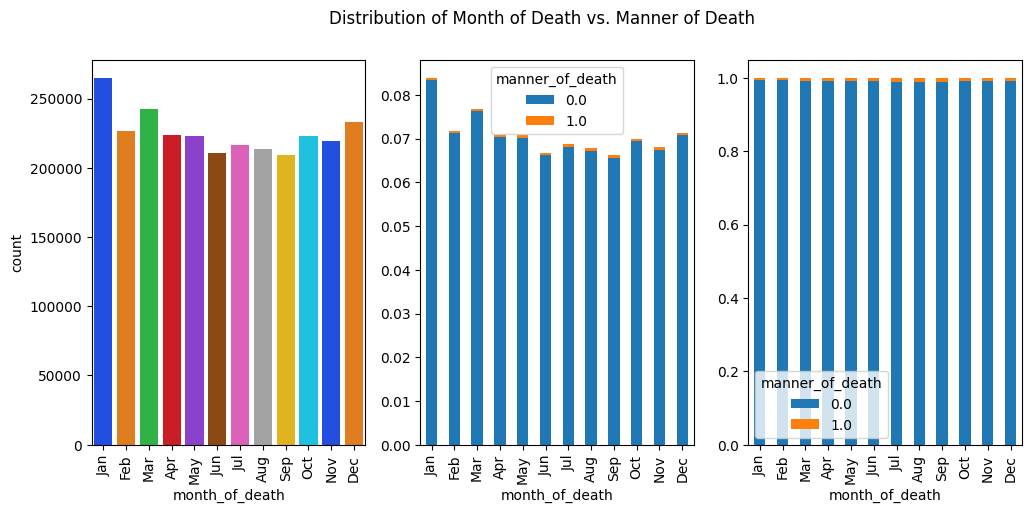

In [319]:
# Value Counts
month_of_death_counts = new_death['month_of_death'].value_counts()
print("month_of_death Frequency:")
print(month_of_death_counts)

# Set Up Plot Configuration
fig, axs = plt.subplots(1, 3, figsize=(12, 5))
fig.suptitle("Distribution of Month of Death vs. Manner of Death")

# Plot Counts
sns.countplot(x="month_of_death", data=new_death, ax=axs[0], palette = "bright")
labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
axs[0].set_xticks(range(len(labels)))
axs[0].set_xticklabels(labels, rotation=90)

# Plot Counts with Overlay
crosstab_month = pd.crosstab(new_death['month_of_death'], new_death['manner_of_death']) / total
crosstab_month.plot(kind='bar', ax=axs[1], stacked = True)
axs[1].set_xticks(range(len(labels)))
axs[1].set_xticklabels(labels, rotation=90)

# Plot Counts with Overlay and Normalization
crosstab_month_norm = crosstab_month.div(crosstab_month.sum(axis=1), axis = 0)
crosstab_month_norm.plot(kind='bar', ax=axs[2], stacked = True)
axs[2].set_xticks(range(len(labels)))
axs[2].set_xticklabels(labels, rotation=90)

##### 3.2.3 sex

sex Frequency:
M    1370430
F    1336714
Name: sex, dtype: int64


<Axes: xlabel='sex'>

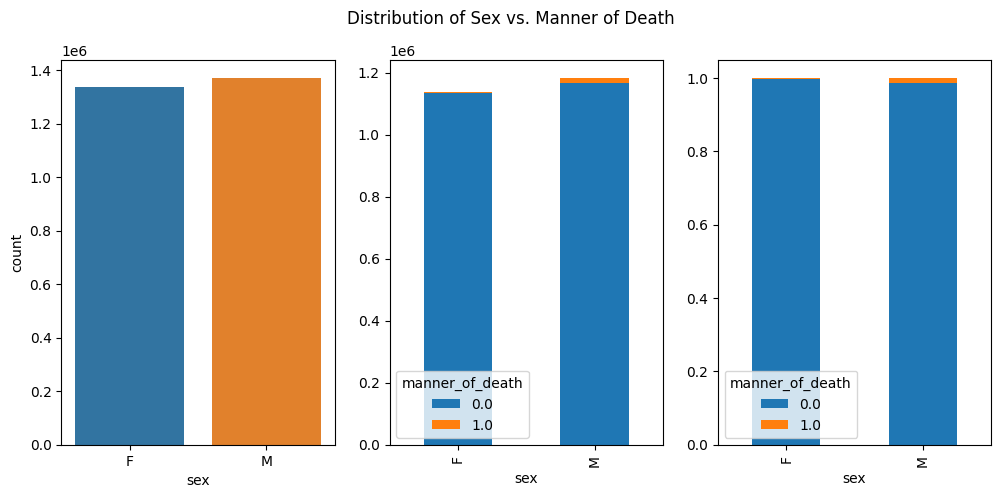

In [320]:
# Value Counts
sex_counts = new_death['sex'].value_counts()
print("sex Frequency:")
print(sex_counts)

# Set Up Plot Configuration
fig, axs = plt.subplots(1, 3, figsize=(12, 5))
fig.suptitle("Distribution of Sex vs. Manner of Death")

# Plot Counts
sns.countplot(x="sex", data=new_death, ax=axs[0])

# Plot Counts with Overlay
crosstab_sex = pd.crosstab(new_death['sex'], new_death['manner_of_death'])
crosstab_sex.plot(kind='bar', ax=axs[1], stacked = True)

# Plot Counts with Overlay and Normalization
crosstab_sex_norm = crosstab_sex.div(crosstab_sex.sum(axis=1), axis = 0)
crosstab_sex_norm.plot(kind='bar', ax=axs[2], stacked = True)

##### 3.2.4 place_of_death_and_decedents_status

place_of_death_and_decedents_status Frequency:
1    808564
4    804134
6    538213
5    209774
2    174077
7    158977
3     12125
9      1280
Name: place_of_death_and_decedents_status, dtype: int64


[Text(0, 0, 'Hospital, Clinic or Medical Center'),
 Text(1, 0, 'Hospital, Clinic or Medical Center'),
 Text(2, 0, 'Hospital, Clinic or Medical Center'),
 Text(3, 0, 'Decedents Home'),
 Text(4, 0, 'Hospice Facility'),
 Text(5, 0, 'Nursing Home/Long Term Care'),
 Text(6, 0, 'Other'),
 Text(7, 0, 'Unknown')]

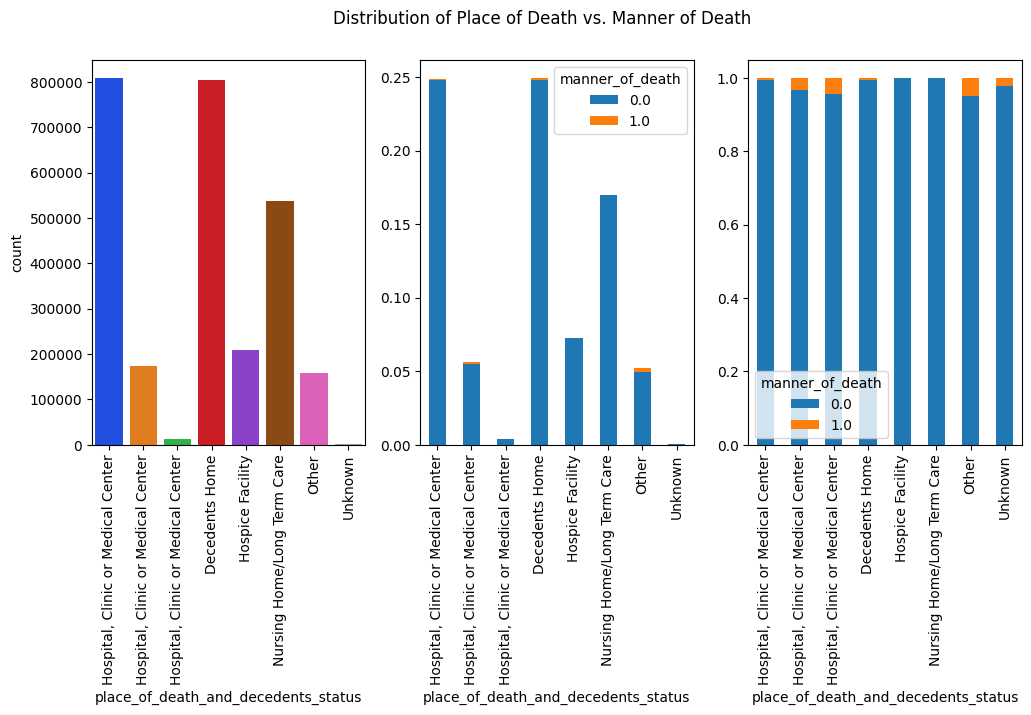

In [321]:
# Value Counts
place_of_death_and_decedents_status_counts = new_death['place_of_death_and_decedents_status'].value_counts()
print("place_of_death_and_decedents_status Frequency:")
print(place_of_death_and_decedents_status_counts)

# Set Up Plot Configuration
fig, axs = plt.subplots(1, 3, figsize=(12, 5))
fig.suptitle("Distribution of Place of Death vs. Manner of Death")

# Plot Counts
sns.countplot(x="place_of_death_and_decedents_status", data=new_death, ax=axs[0], palette = "bright")
labels = ["Hospital, Clinic or Medical Center", "Hospital, Clinic or Medical Center", "Hospital, Clinic or Medical Center", "Decedents Home", "Hospice Facility", "Nursing Home/Long Term Care", "Other", "Unknown"]
axs[0].set_xticks(range(len(labels)))
axs[0].set_xticklabels(labels, rotation=90)

# Plot Counts with Overlay
crosstab_place_of_death_and_decedents_status = pd.crosstab(new_death['place_of_death_and_decedents_status'], new_death['manner_of_death']) / total
crosstab_place_of_death_and_decedents_status.plot(kind='bar', ax=axs[1], stacked = True)
axs[1].set_xticks(range(len(labels)))
axs[1].set_xticklabels(labels, rotation=90)

# Plot Counts with Overlay and Normalization
crosstab_place_of_death_and_decedents_status_norm = crosstab_place_of_death_and_decedents_status.div(crosstab_place_of_death_and_decedents_status.sum(axis=1), axis = 0)
crosstab_place_of_death_and_decedents_status_norm.plot(kind='bar', ax=axs[2], stacked = True)
axs[2].set_xticks(range(len(labels)))
axs[2].set_xticklabels(labels, rotation=90)

##### 3.2.5 marital_status

marital_status Frequency:
M    1000339
W     921304
D     420304
S     345425
U      19772
Name: marital_status, dtype: int64


[Text(0, 0, 'Divorced'),
 Text(1, 0, 'Married'),
 Text(2, 0, 'Single'),
 Text(3, 0, 'Unknown'),
 Text(4, 0, 'Widowed')]

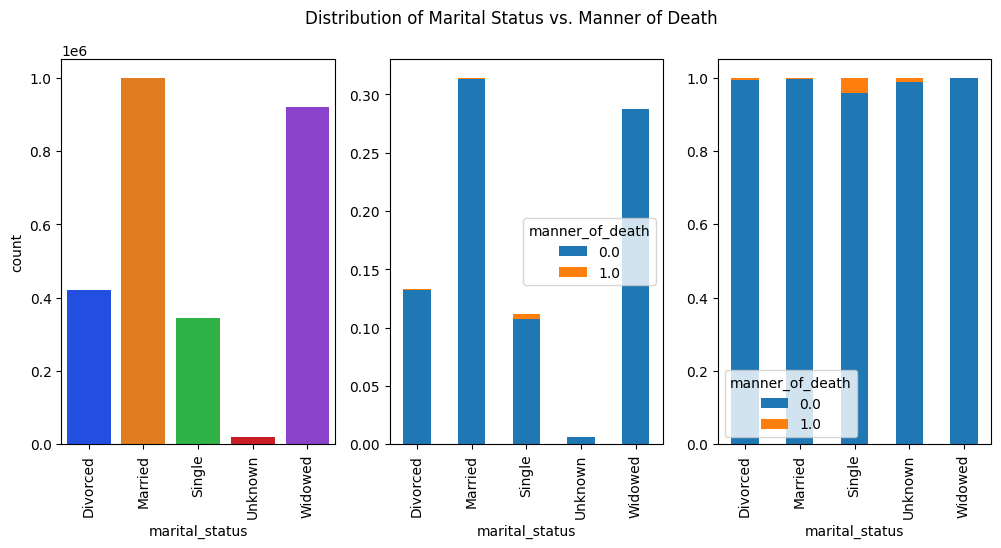

In [322]:
# Value Counts
marital_status_counts = new_death['marital_status'].value_counts()
print("marital_status Frequency:")
print(marital_status_counts)

# Set Up Plot Configuration
fig, axs = plt.subplots(1, 3, figsize=(12, 5))
fig.suptitle("Distribution of Marital Status vs. Manner of Death")

# Plot Counts
sns.countplot(x="marital_status", data=new_death, ax=axs[0], palette = "bright")
labels = ["Divorced", "Married", "Single", "Unknown", "Widowed"]
axs[0].set_xticks(range(len(labels)))
axs[0].set_xticklabels(labels, rotation=90)

# Plot Counts with Overlay
crosstab_marital_status = pd.crosstab(new_death['marital_status'], new_death['manner_of_death']) / total
crosstab_marital_status.plot(kind='bar', ax=axs[1], stacked = True)
axs[1].set_xticks(range(len(labels)))
axs[1].set_xticklabels(labels, rotation=90)

# Plot Counts with Overlay and Normalization
crosstab_marital_status_norm = crosstab_marital_status.div(crosstab_marital_status.sum(axis=1), axis = 0)
crosstab_marital_status_norm.plot(kind='bar', ax=axs[2], stacked = True)
axs[2].set_xticks(range(len(labels)))
axs[2].set_xticklabels(labels, rotation=90)

##### 3.2.6 day_of_week_of_death

day_of_week_of_death Frequency:
5    392953
7    388591
6    388325
2    385865
1    384548
3    383377
4    383351
9       134
Name: day_of_week_of_death, dtype: int64


[Text(0, 0, 'Sunday'),
 Text(1, 0, 'Monday'),
 Text(2, 0, 'Tuesday'),
 Text(3, 0, 'Wednesday'),
 Text(4, 0, 'Thursday'),
 Text(5, 0, 'Friday'),
 Text(6, 0, 'Saturday'),
 Text(7, 0, 'Unknown')]

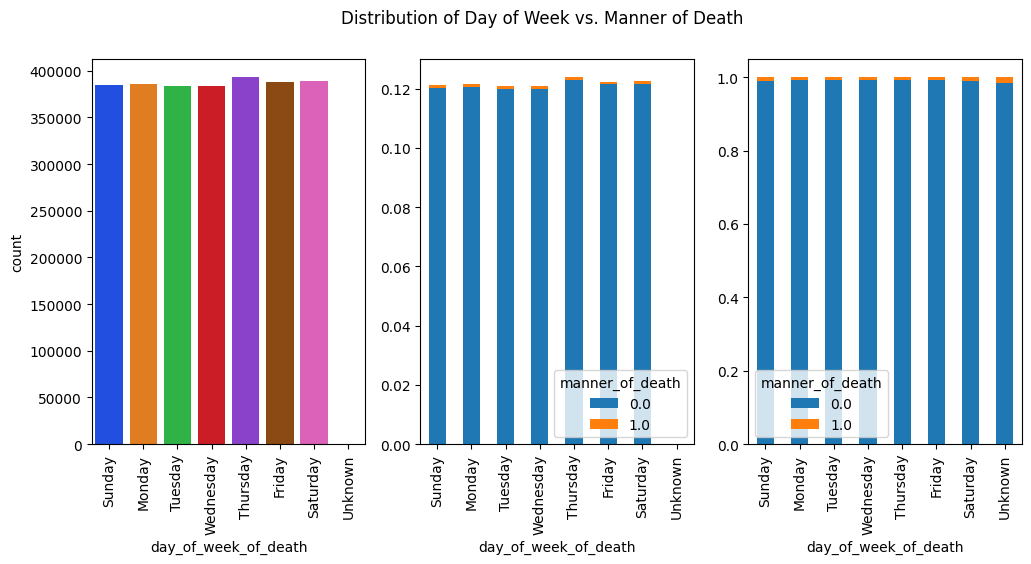

In [323]:
# Value Counts
day_of_week_of_death_counts = new_death['day_of_week_of_death'].value_counts()
print("day_of_week_of_death Frequency:")
print(day_of_week_of_death_counts)

# Set Up Plot Configuration
fig, axs = plt.subplots(1, 3, figsize=(12, 5))
fig.suptitle("Distribution of Day of Week vs. Manner of Death")

# Plot Counts
sns.countplot(x="day_of_week_of_death", data=new_death, ax=axs[0], palette = "bright")
labels = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Unknown"]
axs[0].set_xticks(range(len(labels)))
axs[0].set_xticklabels(labels, rotation=90)

# Plot Counts with Overlay
crosstab_day_of_week_of_death = pd.crosstab(new_death['day_of_week_of_death'], new_death['manner_of_death']) / total
crosstab_day_of_week_of_death.plot(kind='bar', ax=axs[1], stacked = True)
axs[1].set_xticks(range(len(labels)))
axs[1].set_xticklabels(labels, rotation=90)

# Plot Counts with Overlay and Normalization
crosstab_day_of_week_of_death_norm = crosstab_day_of_week_of_death.div(crosstab_day_of_week_of_death.sum(axis=1), axis = 0)
crosstab_day_of_week_of_death_norm.plot(kind='bar', ax=axs[2], stacked = True)
axs[2].set_xticks(range(len(labels)))
axs[2].set_xticklabels(labels, rotation=90)

##### 3.2.7 injury_at_work

injury_at_work Frequency:
U    2492130
N     210796
Y       4218
Name: injury_at_work, dtype: int64


[Text(0, 0, 'No'), Text(1, 0, 'Unknown'), Text(2, 0, 'Yes')]

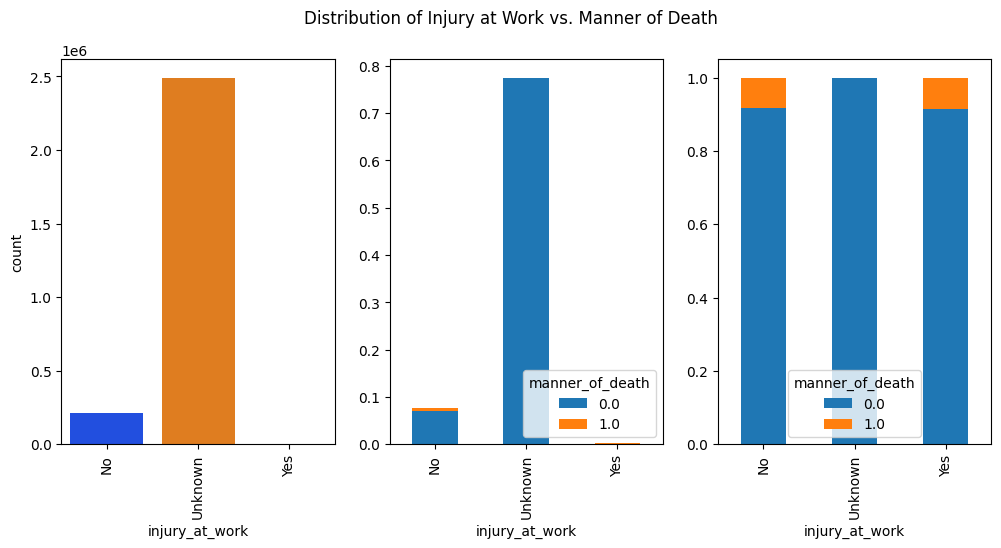

In [324]:
# Value Counts
injury_at_work_counts = new_death['injury_at_work'].value_counts()
print("injury_at_work Frequency:")
print(injury_at_work_counts)

# Set Up Plot Configuration
fig, axs = plt.subplots(1, 3, figsize=(12, 5))
fig.suptitle("Distribution of Injury at Work vs. Manner of Death")

# Plot Counts
sns.countplot(x="injury_at_work", data=new_death, ax=axs[0], palette = "bright")
labels = ["No", "Unknown", "Yes"]
axs[0].set_xticks(range(len(labels)))
axs[0].set_xticklabels(labels, rotation=90)

# Plot Counts with Overlay
crosstab_injury_at_work = pd.crosstab(new_death['injury_at_work'], new_death['manner_of_death']) / total
crosstab_injury_at_work.plot(kind='bar', ax=axs[1], stacked = True)
axs[1].set_xticks(range(len(labels)))
axs[1].set_xticklabels(labels, rotation=90)

# Plot Counts with Overlay and Normalization
crosstab_injury_at_work_norm = crosstab_injury_at_work.div(crosstab_injury_at_work.sum(axis=1), axis = 0)
crosstab_injury_at_work_norm.plot(kind='bar', ax=axs[2], stacked = True)
axs[2].set_xticks(range(len(labels)))
axs[2].set_xticklabels(labels, rotation=90)

##### 3.2.8 method_of_disposition

method_of_disposition Frequency:
B    1243416
C    1238345
U      73584
R      71540
E      40847
D      27812
O      11600
Name: method_of_disposition, dtype: int64


[Text(0, 0, 'Burial'),
 Text(1, 0, 'Cremation'),
 Text(2, 0, 'D'),
 Text(3, 0, 'E'),
 Text(4, 0, 'Other'),
 Text(5, 0, 'R'),
 Text(6, 0, 'Unknown')]

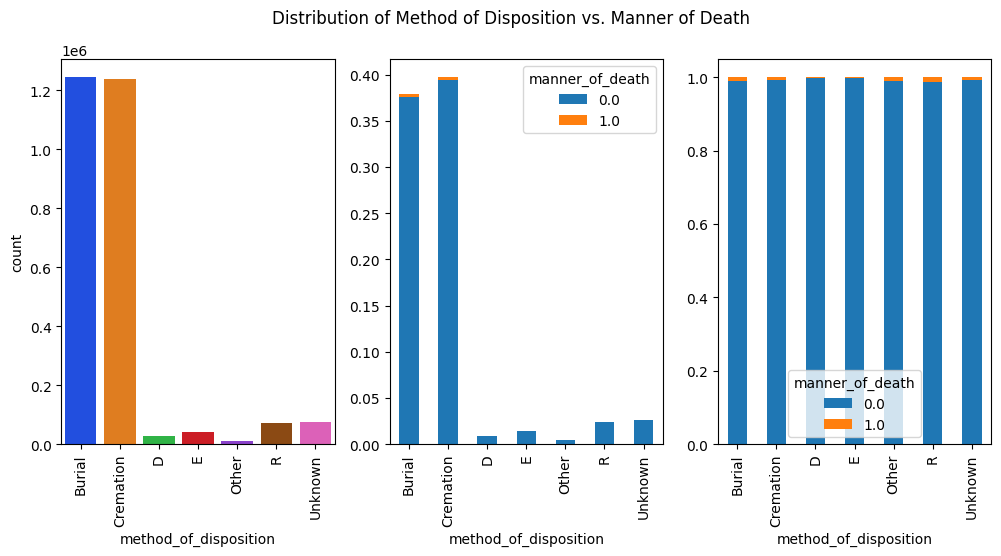

In [325]:
# Value Counts
method_of_disposition_counts = new_death['method_of_disposition'].value_counts()
print("method_of_disposition Frequency:")
print(method_of_disposition_counts)

# Set Up Plot Configuration
fig, axs = plt.subplots(1, 3, figsize=(12, 5))
fig.suptitle("Distribution of Method of Disposition vs. Manner of Death")

# Plot Counts
sns.countplot(x="method_of_disposition", data=new_death, ax=axs[0], palette = "bright")
labels = ["Burial", "Cremation", "D", "E", "Other", "R", "Unknown"]
axs[0].set_xticks(range(len(labels)))
axs[0].set_xticklabels(labels, rotation=90)

# Plot Counts with Overlay
crosstab_method_of_disposition = pd.crosstab(new_death['method_of_disposition'], new_death['manner_of_death']) / total
crosstab_method_of_disposition.plot(kind='bar', ax=axs[1], stacked = True)
axs[1].set_xticks(range(len(labels)))
axs[1].set_xticklabels(labels, rotation=90)

# Plot Counts with Overlay and Normalization
crosstab_method_of_disposition_norm = crosstab_method_of_disposition.div(crosstab_method_of_disposition.sum(axis=1), axis = 0)
crosstab_method_of_disposition_norm.plot(kind='bar', ax=axs[2], stacked = True)
axs[2].set_xticks(range(len(labels)))
axs[2].set_xticklabels(labels, rotation=90)

##### 3.2.9 autopsy

autopsy Frequency:
N    2319613
Y     199498
U     188033
Name: autopsy, dtype: int64


[Text(0, 0, 'No'), Text(1, 0, 'Unknown'), Text(2, 0, 'Yes')]

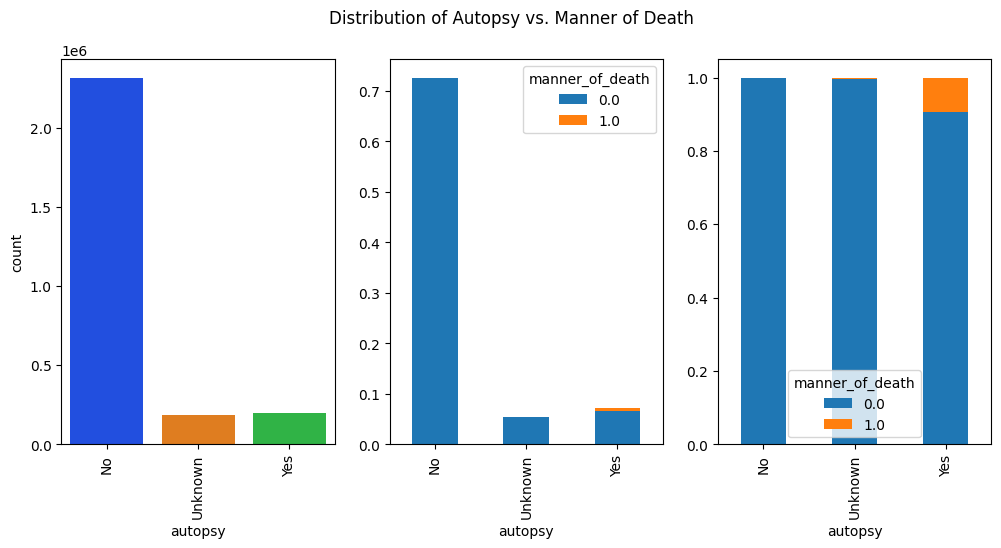

In [326]:
# Value Counts
autopsy_counts = new_death['autopsy'].value_counts()
print("autopsy Frequency:")
print(autopsy_counts)

# Set Up Plot Configuration
fig, axs = plt.subplots(1, 3, figsize=(12, 5))
fig.suptitle("Distribution of Autopsy vs. Manner of Death")

# Plot Counts
sns.countplot(x="autopsy", data=new_death, ax=axs[0], palette = "bright")
labels = ["No", "Unknown", "Yes"]
axs[0].set_xticks(range(len(labels)))
axs[0].set_xticklabels(labels, rotation=90)

# Plot Counts with Overlay
crosstab_autopsy = pd.crosstab(new_death['autopsy'], new_death['manner_of_death']) / total
crosstab_autopsy.plot(kind='bar', ax=axs[1], stacked = True)
axs[1].set_xticks(range(len(labels)))
axs[1].set_xticklabels(labels, rotation=90)

# Plot Counts with Overlay and Normalization
crosstab_autopsy_norm = crosstab_autopsy.div(crosstab_autopsy.sum(axis=1), axis = 0)
crosstab_autopsy_norm.plot(kind='bar', ax=axs[2], stacked = True)
axs[2].set_xticks(range(len(labels)))
axs[2].set_xticklabels(labels, rotation=90)

##### 3.2.10 race

race Frequency:
1     2302686
2      318586
3       18800
4       14496
7       12014
5        8502
68       8164
18       8098
48       5551
28       5352
78       3075
6         748
38        681
58        391
Name: race, dtype: int64


[Text(0, 0, 'White'),
 Text(1, 0, 'Black'),
 Text(2, 0, 'American Indian'),
 Text(3, 0, 'Chinese'),
 Text(4, 0, 'Japanese'),
 Text(5, 0, 'Hawaiian'),
 Text(6, 0, 'Filipino'),
 Text(7, 0, 'Asian Indian'),
 Text(8, 0, 'Korean'),
 Text(9, 0, 'Samoan'),
 Text(10, 0, 'Vietnamese'),
 Text(11, 0, 'Guamanian'),
 Text(12, 0, 'Other Asian or Pacific Islander'),
 Text(13, 0, 'Combined other Asian or Pacific Islander')]

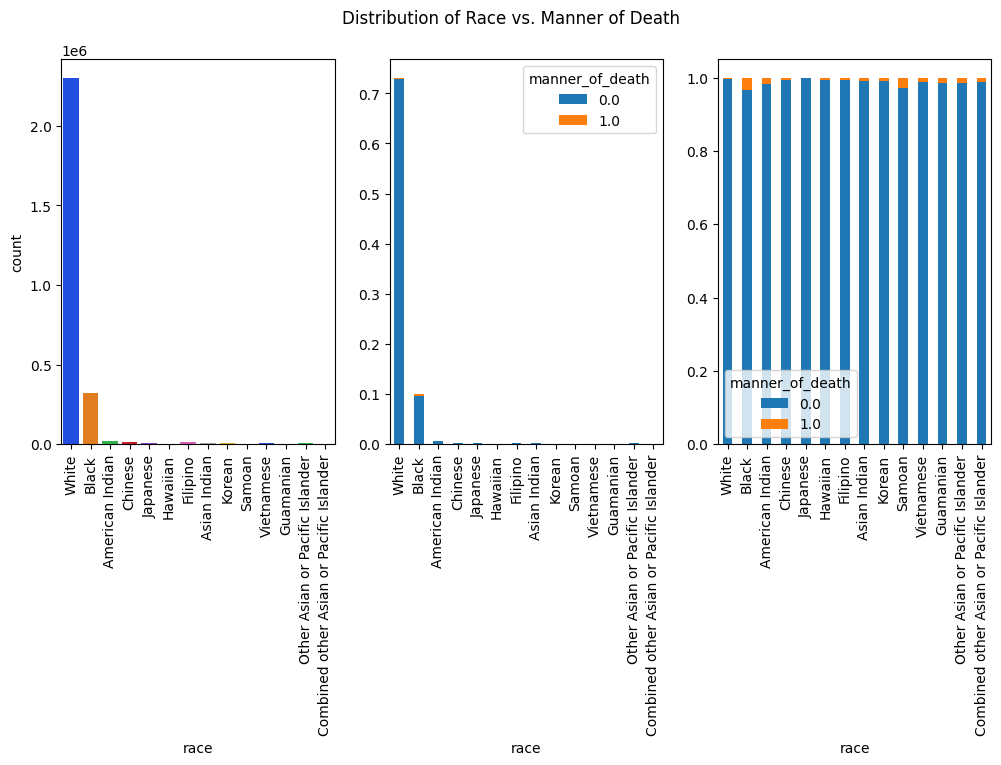

In [327]:
# Value Counts
race_counts = new_death['race'].value_counts()
print("race Frequency:")
print(race_counts)

# Set Up Plot Configuration
fig, axs = plt.subplots(1, 3, figsize=(12, 5))
fig.suptitle("Distribution of Race vs. Manner of Death")

# Plot Counts
sns.countplot(x="race", data=new_death, ax=axs[0], palette = "bright")
labels = ["White", "Black", "American Indian", "Chinese", "Japanese", "Hawaiian", "Filipino", "Asian Indian",
          "Korean", "Samoan", "Vietnamese", "Guamanian", "Other Asian or Pacific Islander", "Combined other Asian or Pacific Islander"]
axs[0].set_xticks(range(len(labels)))
axs[0].set_xticklabels(labels, rotation=90)

# Plot Counts with Overlay
crosstab_race = pd.crosstab(new_death['race'], new_death['manner_of_death']) / total
crosstab_race.plot(kind='bar', ax=axs[1], stacked = True)
axs[1].set_xticks(range(len(labels)))
axs[1].set_xticklabels(labels, rotation=90)

crosstab_race_norm = crosstab_race.div(crosstab_race.sum(axis=1), axis = 0)
crosstab_race_norm.plot(kind='bar', ax=axs[2], stacked = True)
axs[2].set_xticks(range(len(labels)))
axs[2].set_xticklabels(labels, rotation=90)

##### 3.2.11 manner_of_death

manner_of_death Frequency:
0.0    2299895
1.0      18885
Name: manner_of_death, dtype: int64


([<matplotlib.axis.XTick at 0x7d1b086e7ee0>,
 [Text(0, 0, 'Not Homicide'), Text(1, 0, 'Homicide')])

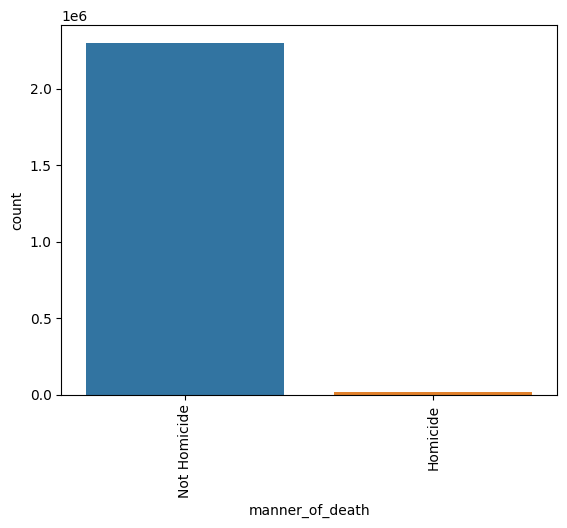

In [328]:
# Value Counts
manner_of_death_counts = new_death['manner_of_death'].value_counts()
print("manner_of_death Frequency:")
print(manner_of_death_counts)

# Plot Counts
sns.countplot(x="manner_of_death", data=new_death)
labels = ["Not Homicide", "Homicide"]
plt.xticks(range(len(labels)), labels, rotation=90)

#### 3.3 Numerical Data Analysis

3.3.1 detail_age

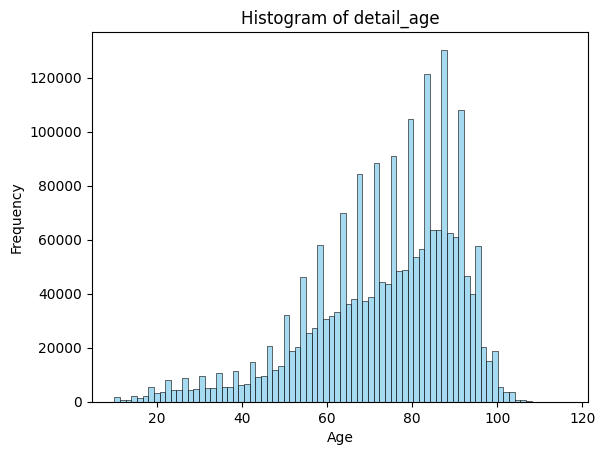

In [443]:
detail_age = new_death['detail_age']
sns.histplot(detail_age, bins=80, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of detail_age')
plt.show()

There are outliers that are causing a non-representative view of the age distribution. We will remove the outliers.

In [330]:
# Compute z-score for every data point in detail_age
new_death['z_detail_age'] = (new_death['detail_age']-new_death['detail_age'].mean())/new_death['detail_age'].std()
print('Number of rows before discarding outliers = %d' % (new_death.shape[0]))

# Removes rows with a zscore beyond 3 or -3
new_death = new_death[(new_death['z_detail_age'] <= 3) & (new_death['z_detail_age'] >= -3)]
print('Number of rows after discarding missing values = %d' % (new_death.shape[0]))

# Drop the 'C' column
column_name = 'z_detail_age'
new_death.drop(column_name, axis=1, inplace=True)

Number of rows before discarding outliers = 2707144
Number of rows after discarding missing values = 2684915


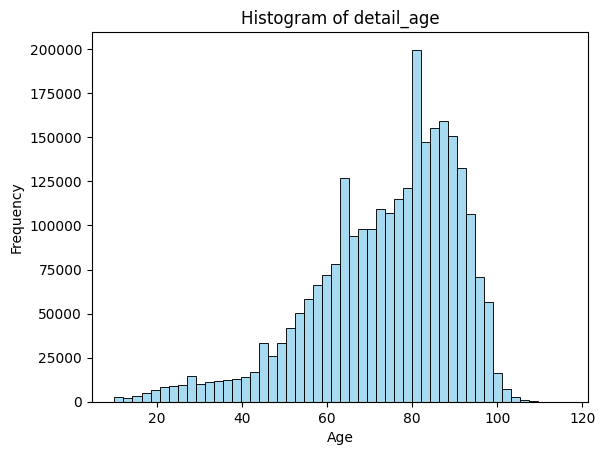

In [331]:
# Plot a Histogram for detail_age excluding outliers
detail_age = new_death['detail_age']
sns.histplot(detail_age, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of detail_age')
plt.show()

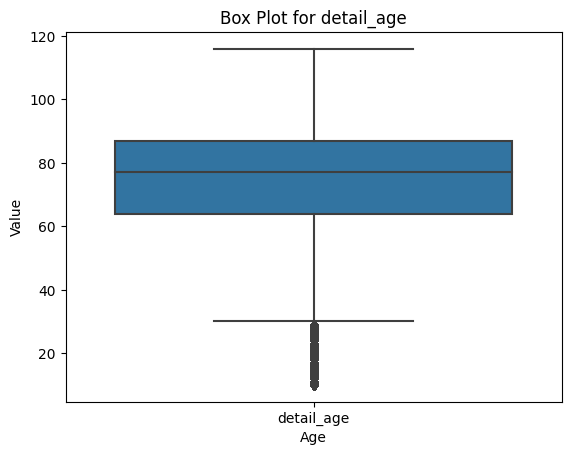

In [332]:
# Plot a Box Plot for detail_age
sns.boxplot(data=new_death[['detail_age']])
plt.xlabel('Age')
plt.ylabel('Value')
plt.title("Box Plot for detail_age")
plt.show()

<Axes: xlabel='detail_age', ylabel='manner_of_death'>

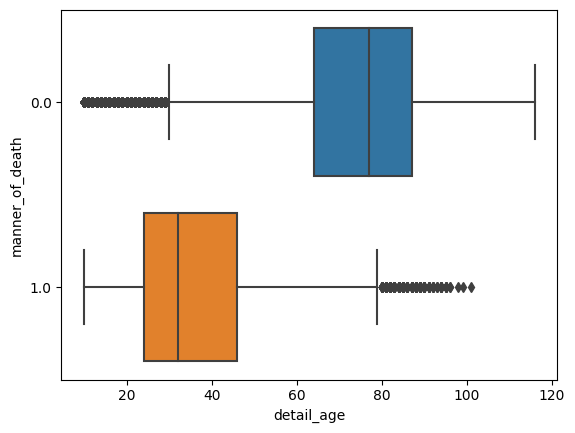

In [333]:
# Plot a Box Plot for detail_age grouped by manner_of_death
sns.boxplot(x="detail_age", y="manner_of_death", data=new_death)

#### 3.4 Correlation Analysis

Drop Remaining N/A's

In [334]:
new_death = new_death.dropna()

3.4.1 education_2003_revision and manner_of_death

In [335]:
# Create a cross-tabulation (crosstab) between education_2003_revision and manner_of_death
education_2003_revision_manner_of_death_crosstab = pd.crosstab(new_death['education_2003_revision'], new_death['manner_of_death'])

# Print the cross-tabulation
print("Cross-Tabulation between education_2003_revision and manner_of_death: Original")
print(education_2003_revision_manner_of_death_crosstab)

Cross-Tabulation between education_2003_revision and manner_of_death: Original
manner_of_death             0.0   1.0
education_2003_revision              
1.0                      219352  1114
2.0                      236085  4433
3.0                      928884  7827
4.0                      256668  2181
5.0                      133031   670
6.0                      216256   640
7.0                       85872   185
8.0                       34044    71
9.0                      102001   431


In [336]:
# Perform the chi-square test - education_2003_revision and manner_of_death
chi2, p, dof, expected_edu = chi2_contingency(education_2003_revision_manner_of_death_crosstab)

# Print the results
print(f"Chi-Square Value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected_edu)

Chi-Square Value: 5192.387479613412
P-value: 0.0
Degrees of Freedom: 8
Expected Frequencies:
[[2.18730546e+05 1.73545371e+03]
 [2.38624702e+05 1.89329808e+03]
 [9.29337443e+05 7.37355683e+03]
 [2.56811405e+05 2.03759517e+03]
 [1.32648539e+05 1.05246113e+03]
 [2.15188648e+05 1.70735155e+03]
 [8.53795806e+04 6.77419375e+02]
 [3.38464552e+04 2.68544825e+02]
 [1.01625681e+05 8.06319316e+02]]


3.4.2 month_of_death and manner_of_death

In [337]:
# Create a cross-tabulation (crosstab) between month_of_death and manner_of_death
month_of_death_manner_of_death_crosstab = pd.crosstab(new_death['month_of_death'], new_death['manner_of_death'])

# Print the cross-tabulation
print("Cross-Tabulation between month_of_death and manner_of_death: Original")
print(month_of_death_manner_of_death_crosstab)

Cross-Tabulation between month_of_death and manner_of_death: Original
manner_of_death     0.0   1.0
month_of_death               
1                218118  1406
2                186118  1073
3                199400  1337
4                184174  1284
5                183545  1489
6                172890  1523
7                178040  1656
8                175776  1681
9                171432  1590
10               181528  1491
11               176308  1475
12               184864  1547


In [338]:
# Perform the chi-square test - month_of_death and manner_of_death
chi2, p, dof, expected_month = chi2_contingency(month_of_death_manner_of_death_crosstab)

# Print the results
print(f"Chi-Square Value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected_month)

Chi-Square Value: 395.05381966963506
P-value: 6.863900635327697e-78
Degrees of Freedom: 11
Expected Frequencies:
[[217795.9614808    1728.0385192 ]
 [185717.4788431    1473.5211569 ]
 [199156.84808846   1580.15191154]
 [183998.12058957   1459.87941043]
 [183577.45821249   1456.54178751]
 [173040.06409208   1372.93590792]
 [178281.47762547   1414.52237453]
 [176060.10247853   1396.89752147]
 [171660.01369932   1361.98630068]
 [181578.31979307   1440.68020693]
 [176383.53628733   1399.46371267]
 [184943.61880977   1467.38119023]]


3.4.3 sex and manner_of_death

In [339]:
# Create a cross-tabulation (crosstab) between sex and manner_of_death
sex_manner_of_death_crosstab = pd.crosstab(new_death['sex'], new_death['manner_of_death'])

# Print the cross-tabulation
print("Cross-Tabulation between sex and manner_of_death:")
print(sex_manner_of_death_crosstab)

Cross-Tabulation between sex and manner_of_death:
manner_of_death      0.0    1.0
sex                            
F                1090705   3274
M                1121488  14278


In [340]:
# Perform the chi-square test - sex and manner_of_death
chi2, p, dof, expected_sex = chi2_contingency(sex_manner_of_death_crosstab)

# Print the results
print(f"Chi-Square Value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected_sex)

Chi-Square Value: 6545.120746240833
P-value: 0.0
Degrees of Freedom: 1
Expected Frequencies:
[[1085367.46845357    8611.53154643]
 [1126825.53154643    8940.46845357]]


3.4.4 place_of_death_and_decedents_status and manner_of_death

In [341]:
# Create a cross-tabulation (crosstab) between place_of_death_and_decedents_status and manner_of_death
place_of_death_and_decedents_status_manner_of_death_crosstab = pd.crosstab(new_death['place_of_death_and_decedents_status'], new_death['manner_of_death'])

# Print the cross-tabulation
print("Cross-Tabulation between place_of_death_and_decedents_status and manner_of_death: Original")
print(place_of_death_and_decedents_status_manner_of_death_crosstab)

Cross-Tabulation between place_of_death_and_decedents_status and manner_of_death: Original
manner_of_death                         0.0   1.0
place_of_death_and_decedents_status              
1                                    639660  2255
2                                    140540  4562
3                                     10213   470
4                                    646320  3474
5                                    197112    64
6                                    448736    94
7                                    128651  6614
9                                       961    19


In [342]:
# Perform the chi-square test - place_of_death_and_decedents_status and manner_of_death
chi2, p, dof, expected_place = chi2_contingency(place_of_death_and_decedents_status_manner_of_death_crosstab)

# Print the results
print(f"Chi-Square Value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected_place)

Chi-Square Value: 48176.40824986549
P-value: 0.0
Degrees of Freedom: 7
Expected Frequencies:
[[6.36862004e+05 5.05299578e+03]
 [1.43959793e+05 1.14220698e+03]
 [1.05989061e+04 8.40939282e+01]
 [6.44678983e+05 5.11501732e+03]
 [1.95623879e+05 1.55212060e+03]
 [4.45296921e+05 3.53307852e+03]
 [1.34200227e+05 1.06477255e+03]
 [9.72285683e+02 7.71431711e+00]]


3.4.5 marital_status and manner_of_death

In [343]:
# Create a cross-tabulation (crosstab) between marital_status and manner_of_death
marital_status_manner_of_death_crosstab = pd.crosstab(new_death['marital_status'], new_death['manner_of_death'])

# Print the cross-tabulation
print("Cross-Tabulation between marital_status and manner_of_death: Original")
print(marital_status_manner_of_death_crosstab)

Cross-Tabulation between marital_status and manner_of_death: Original
manner_of_death     0.0    1.0
marital_status                
D                348096   2102
M                824980   3318
S                266159  11392
U                 16245    201
W                756713    539


In [344]:
# Perform the chi-square test - marital_status and manner_of_death
chi2, p, dof, expected_marital = chi2_contingency(marital_status_manner_of_death_crosstab)

# Print the results
print(f"Chi-Square Value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected_marital)

Chi-Square Value: 45861.00363672062
P-value: 0.0
Degrees of Freedom: 4
Expected Frequencies:
[[3.47441328e+05 2.75667186e+03]
 [8.21777843e+05 6.52015656e+03]
 [2.75366187e+05 2.18481268e+03]
 [1.63165412e+04 1.29458836e+02]
 [7.51291100e+05 5.96090006e+03]]


3.4.6 day_of_week_of_death and manner_of_death

In [345]:
# Create a cross-tabulation (crosstab) between day_of_week_of_death and manner_of_death
day_of_week_of_death_manner_of_death_crosstab = pd.crosstab(new_death['day_of_week_of_death'], new_death['manner_of_death'])

# Print the cross-tabulation
print("Cross-Tabulation between day_of_week_of_death and manner_of_death: Original")
print(day_of_week_of_death_manner_of_death_crosstab)

Cross-Tabulation between day_of_week_of_death and manner_of_death: Original
manner_of_death          0.0   1.0
day_of_week_of_death              
1                     314114  3030
2                     315191  2342
3                     313678  2316
4                     313232  2350
5                     321064  2367
6                     317392  2294
7                     317390  2851
9                        132     2


In [346]:
# Perform the chi-square test - day_of_week_of_death and manner_of_death
chi2, p, dof, expected_day = chi2_contingency(day_of_week_of_death_manner_of_death_crosstab)

# Print the results
print(f"Chi-Square Value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected_day)

Chi-Square Value: 221.0855974013681
P-value: 3.8811978583349507e-44
Degrees of Freedom: 7
Expected Frequencies:
[[3.14647521e+05 2.49647896e+03]
 [3.15033459e+05 2.49954108e+03]
 [3.13506574e+05 2.48742645e+03]
 [3.13097817e+05 2.48418329e+03]
 [3.20885031e+05 2.54596867e+03]
 [3.17169511e+05 2.51648896e+03]
 [3.17720142e+05 2.52085778e+03]
 [1.32945185e+02 1.05481479e+00]]


3.4.7 injury_at_work and manner_of_death

In [347]:
# Create a cross-tabulation (crosstab) between injury_at_work and manner_of_death
injury_at_work_manner_of_death_crosstab = pd.crosstab(new_death['injury_at_work'], new_death['manner_of_death'])

# Print the cross-tabulation
print("Cross-Tabulation between injury_at_work and manner_of_death: Original")
print(injury_at_work_manner_of_death_crosstab)

Cross-Tabulation between injury_at_work and manner_of_death: Original
manner_of_death      0.0    1.0
injury_at_work                 
N                 182875  16164
U                2025560   1037
Y                   3758    351


In [348]:
# Perform the chi-square test - injury_at_work and manner_of_death
chi2, p, dof, expected_injury = chi2_contingency(injury_at_work_manner_of_death_crosstab)

# Print the results
print(f"Chi-Square Value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected_injury)

Chi-Square Value: 154297.50582836533
P-value: 0.0
Degrees of Freedom: 2
Expected Frequencies:
[[1.97472214e+05 1.56678568e+03]
 [2.01064413e+06 1.59528693e+04]
 [4.07665497e+03 3.23450296e+01]]


3.4.8 method_of_disposition and manner_of_death

In [349]:
# Create a cross-tabulation (crosstab) between method_of_disposition and manner_of_death
method_of_disposition_manner_of_death_crosstab = pd.crosstab(new_death['method_of_disposition'], new_death['manner_of_death'])

# Print the cross-tabulation
print("Cross-Tabulation between method_of_disposition and manner_of_death: Original")
print(method_of_disposition_manner_of_death_crosstab)

Cross-Tabulation between method_of_disposition and manner_of_death: Original
manner_of_death            0.0   1.0
method_of_disposition               
B                      1011971  9960
C                      1063861  6628
D                        23009    15
E                        38252    82
O                        10847    94
R                        63479   764
U                          774     9


In [350]:
# Perform the chi-square test - method_of_disposition and manner_of_death
chi2, p, dof, expected_method = chi2_contingency(method_of_disposition_manner_of_death_crosstab)

# Print the results
print(f"Chi-Square Value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected_method)

Chi-Square Value: 1296.7532091342005
P-value: 5.464906697135237e-277
Degrees of Freedom: 6
Expected Frequencies:
[[1.01388661e+06 8.04438755e+03]
 [1.06206238e+06 8.42662409e+03]
 [2.28427608e+04 1.81239222e+02]
 [3.80322443e+04 3.01755747e+02]
 [1.08548752e+04 8.61248403e+01]
 [6.37372950e+04 5.05704973e+02]
 [7.76836418e+02 6.16358193e+00]]


3.4.9 autopsy and manner_of_death

In [351]:
# Create a cross-tabulation (crosstab) between autopsy and manner_of_death
autopsy_manner_of_death_crosstab = pd.crosstab(new_death['autopsy'], new_death['manner_of_death'])

# Print the cross-tabulation
print("Cross-Tabulation between autopsy and manner_of_death: Original")
print(autopsy_manner_of_death_crosstab)

Cross-Tabulation between autopsy and manner_of_death: Original
manner_of_death      0.0    1.0
autopsy                        
N                1904259    292
U                 140002    514
Y                 167932  16746


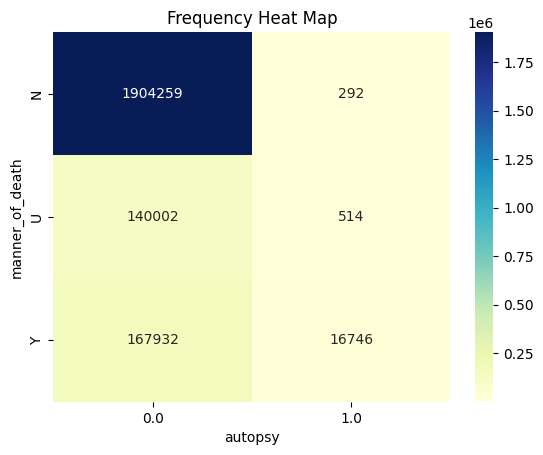

In [352]:
# Create a heat map
sns.heatmap(autopsy_manner_of_death_crosstab, annot=True, cmap='YlGnBu', fmt='d')

plt.title("Frequency Heat Map")
plt.xlabel("autopsy")
plt.ylabel("manner_of_death")

plt.show()

In [353]:
# Perform the chi-square test - autopsy and manner_of_death
chi2, p, dof, expected_autopsy = chi2_contingency(autopsy_manner_of_death_crosstab)

# Print the results
print(f"Chi-Square Value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected_autopsy)

Chi-Square Value: 176987.23671864741
P-value: 0.0
Degrees of Freedom: 2
Expected Frequencies:
[[1.88955885e+06 1.49921534e+04]
 [1.39409893e+05 1.10610713e+03]
 [1.83224261e+05 1.45373944e+03]]


3.4.10 race and manner_of_death

In [354]:
# Create a cross-tabulation (crosstab) between race and manner_of_death
race_manner_of_death_crosstab = pd.crosstab(new_death['race'], new_death['manner_of_death'])

# Print the cross-tabulation
print("Cross-Tabulation between race and manner_of_death: Original")
print(race_manner_of_death_crosstab)


Cross-Tabulation between race and manner_of_death: Original
manner_of_death      0.0   1.0
race                          
1                1909222  8120
2                 246653  8798
3                  16179   287
4                   7461    46
5                   5500    12
6                    633     5
7                   5893    32
18                  6016    56
28                  3135    30
38                   430    13
48                  3026    39
58                   277     4
68                  5213    83
78                  2555    27


In [355]:
# Perform the chi-square test - race and manner_of_death
chi2, p, dof, expected_race = chi2_contingency(race_manner_of_death_crosstab)

# Print the results
print(f"Chi-Square Value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected_race)

Chi-Square Value: 26643.07972769081
P-value: 0.0
Degrees of Freedom: 13
Expected Frequencies:
[[1.90224916e+06 1.50928410e+04]
 [2.53440153e+05 2.01084696e+03]
 [1.63363837e+04 1.29616271e+02]
 [7.44790676e+03 5.90932434e+01]
 [5.46861090e+03 4.33890979e+01]
 [6.32977822e+02 5.02217787e+00]
 [5.87835987e+03 4.66401315e+01]
 [6.02420272e+03 4.77972791e+01]
 [3.14008590e+03 2.49140956e+01]
 [4.39512814e+02 3.48718620e+00]
 [3.04087308e+03 2.41269203e+01]
 [2.78788038e+02 2.21196235e+00]
 [5.25431120e+03 4.16887994e+01]
 [2.56167514e+03 2.03248641e+01]]


## 4. Data Preprocessing

#### 4.1 Drop Missing Data

In [444]:
# Drop rows with missing values
death_dropped = new_death.dropna()
print(death_dropped.head)

<bound method NDFrame.head of         education_2003_revision month_of_death sex  \
0                           3.0              1   M   
1                           6.0              1   M   
2                           3.0              1   F   
3                           3.0              1   F   
4                           5.0              1   F   
...                         ...            ...  ..   
2718192                     9.0             10   F   
2718194                     9.0             12   F   
2718195                     9.0             12   M   
2718196                     9.0              7   M   
2718197                     9.0             12   M   

        place_of_death_and_decedents_status marital_status  \
0                                         1              M   
1                                         1              M   
2                                         4              W   
3                                         4              S   
4          

In [357]:
# Check Missing Values were Dropped
total_missing_values3 = death_dropped.isnull().sum().sum()
total_elements3 = death_dropped.size
total_percent_missing3 = (total_missing_values3 / total_elements3) * 100
print("Total percentage of missing data in the sample dataset: {:.2f}%".format(total_percent_missing3))

Total percentage of missing data in the sample dataset: 0.00%


#### 4.2 Random Sample

In [445]:
# Perform random sampling
sampled_df = death_dropped.sample(frac=0.3, random_state=1)
print('Number of rows after random sampling = %d' % (sampled_df.shape[0]))

Number of rows after random sampling = 668924


#### 4.3 Normalize Data and Encode Categorical Variables

In [359]:
# Normalize detail_age using Min-Max scaler
mms = MinMaxScaler()
sampled_df[['detail_age']] = mms.fit_transform(sampled_df[['detail_age']])

In [360]:
# Perform one-hot encoding on categorical columns
encoded_df = pd.get_dummies(sampled_df, columns=['education_2003_revision', 'month_of_death', 'sex', 'place_of_death_and_decedents_status', 'marital_status', 'day_of_week_of_death', 'injury_at_work','method_of_disposition', 'autopsy', 'race'],
                            prefix=['education_2003_revision', 'month_of_death', 'sex', 'place_of_death_and_decedents_status', 'marital_status', 'day_of_week_of_death', 'injury_at_work','method_of_disposition', 'autopsy', 'race'])

#### 4.4 Class Imbalances

In [361]:
# Calculate class proportions
class_proportions = encoded_df['manner_of_death'].value_counts(normalize=True)

print(class_proportions)

0.0    0.992104
1.0    0.007896
Name: manner_of_death, dtype: float64


In [362]:
# Split data for rebalancing
train, test = train_test_split(encoded_df, test_size=0.3, random_state=42)

In [363]:
# Identify current proportion of homicide records
total = train.shape[0]
print('\nTotal number of instances in train sample: ', total)

homicide = train['manner_of_death'].value_counts()[1]
print('\nTotal number of homicide instances in train sample: ', homicide)

# Calculate number to resample
x = ((0.2 * total) - homicide) / 0.8
print('\nNumber of homicide records to resample: ', int(x))

# Resample data to increase number of homicide records
to_resample = train.loc[train['manner_of_death'] == 1]
our_resample = to_resample.sample(n = int(x), replace = True)
encoded_df_rebal = pd.concat([train, our_resample])
encoded_df_rebal['manner_of_death'].value_counts()

# Check percentage is met
ratio = encoded_df_rebal['manner_of_death'].value_counts()[1] / encoded_df_rebal.shape[0] * 100
print('\nNew percent of homicide records: ', round(ratio, 0))


Total number of instances in train sample:  468246

Total number of homicide instances in train sample:  3646

Number of homicide records to resample:  112504

New percent of homicide records:  20.0


#### 4.5 Validation Data Set

In [364]:
# Subset data from death_data where manner_of_death is undetermined
validation_data = death_data[death_data['manner_of_death'] == 5]

# Isolate the Desired Columns
desired_columns = ['education_2003_revision', 'month_of_death', 'sex', 'place_of_death_and_decedents_status',
                   'marital_status', 'day_of_week_of_death', 'injury_at_work', 'method_of_disposition',
                   'autopsy', 'race','detail_age']
validation_data = validation_data[desired_columns]

# List of column names to convert to categorical
categorical_columns = ['education_2003_revision', 'month_of_death', 'sex', 'place_of_death_and_decedents_status',
                   'marital_status', 'day_of_week_of_death', 'injury_at_work', 'method_of_disposition', 'autopsy', 'race']

# Convert the selected columns to categorical
validation_data[categorical_columns] = validation_data[categorical_columns].astype('category')

# Drop rows with missing values
validation_data = validation_data.dropna()

## 5. Exploratory Data Analysis (Sampled Data Set)

#### 5.1 Categorical Correlation Analysis

##### 5.1.1 Cross Tabulation and Chi-Squared Test

In [365]:
sampled_df = sampled_df.dropna()
# print(sampled_df)

education_2003_revision and manner_of_death

In [366]:
# Create a cross-tabulation (crosstab) between education_2003_revision and manner_of_death
education_2003_revision_manner_of_death_crosstab2 = pd.crosstab(sampled_df['education_2003_revision'], sampled_df['manner_of_death'])

# Print the cross-tabulation
print("Cross-Tabulation between education_2003_revision and manner_of_death: Sampled")
print(education_2003_revision_manner_of_death_crosstab2)

Cross-Tabulation between education_2003_revision and manner_of_death: Sampled
manner_of_death             0.0   1.0
education_2003_revision              
1.0                       65594   294
2.0                       70644  1385
3.0                      278697  2368
4.0                       77145   678
5.0                       39964   198
6.0                       65084   178
7.0                       25721    56
8.0                       10272    18
9.0                       30521   107


In [367]:
# Perform the chi-square test - education_2003_revision and manner_of_death
chi2, p, dof, expected_edu2 = chi2_contingency(education_2003_revision_manner_of_death_crosstab2)

# Print the results
print(f"Chi-Square Value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected_edu2)

Chi-Square Value: 1797.4539333049195
P-value: 0.0
Degrees of Freedom: 8
Expected Frequencies:
[[6.53677310e+04 5.20268993e+02]
 [7.14602401e+04 5.68759946e+02]
 [2.78845637e+05 2.21936323e+03]
 [7.72084891e+04 6.14510895e+02]
 [3.98448703e+04 3.17129725e+02]
 [6.47466741e+04 5.15325932e+02]
 [2.55734580e+04 2.03541978e+02]
 [1.02087475e+04 8.12525489e+01]
 [3.03861532e+04 2.41846751e+02]]


month_of_death and manner_of_death

In [368]:
# Create a cross-tabulation (crosstab) between month_of_death and manner_of_death
month_of_death_manner_of_death_crosstab2 = pd.crosstab(sampled_df['month_of_death'], sampled_df['manner_of_death'])

# Print the cross-tabulation
print("Cross-Tabulation between month_of_death and manner_of_death: Sampled")
print(month_of_death_manner_of_death_crosstab2)

Cross-Tabulation between month_of_death and manner_of_death: Sampled
manner_of_death    0.0  1.0
month_of_death             
1                65464  439
2                55957  351
3                59836  388
4                55441  399
5                55183  424
6                51889  481
7                53383  490
8                52937  489
9                51049  487
10               54302  441
11               53199  430
12               55002  463


In [369]:
# Perform the chi-square test - month_of_death and manner_of_death
chi2, p, dof, expected_month2 = chi2_contingency(month_of_death_manner_of_death_crosstab2)

# Print the results
print(f"Chi-Square Value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected_month2)

Chi-Square Value: 102.83849847553681
P-value: 4.8869651140993136e-17
Degrees of Freedom: 11
Expected Frequencies:
[[65382.61256286   520.38743714]
 [55863.37720877   444.62279123]
 [59748.45544187   475.54455813]
 [55399.07265997   440.92734003]
 [55167.91248931   439.08751069]
 [51956.47269346   413.52730654]
 [53447.60460979   425.39539021]
 [53004.13423947   421.86576053]
 [51129.05817701   406.94182299]
 [54310.73486076   432.26513924]
 [53205.53129802   423.46870198]
 [55027.03375869   437.96624131]]


sex and manner_of_death




In [370]:
# Create a cross-tabulation (crosstab) between sex and manner_of_death
sex_manner_of_death_crosstab2 = pd.crosstab(sampled_df['sex'], sampled_df['manner_of_death'])

# Print the cross-tabulation
print("Cross-Tabulation between sex and manner_of_death:")
print(sex_manner_of_death_crosstab2)

Cross-Tabulation between sex and manner_of_death:
manner_of_death     0.0   1.0
sex                          
F                327388  1004
M                336254  4278


In [371]:
# Perform the chi-square test - sex and manner_of_death
chi2, p, dof, expected2 = chi2_contingency(sex_manner_of_death_crosstab2)

# Print the results
print(f"Chi-Square Value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected2)

Chi-Square Value: 1926.9041657593466
P-value: 0.0
Degrees of Freedom: 1
Expected Frequencies:
[[325798.93031794   2593.06968206]
 [337843.06968206   2688.93031794]]


place_of_death_and_decedents_status and manner_of_death

In [372]:
# Create a cross-tabulation (crosstab) between place_of_death_and_decedents_status and manner_of_death
place_of_death_and_decedents_status_manner_of_death_crosstab2 = pd.crosstab(sampled_df['place_of_death_and_decedents_status'], sampled_df['manner_of_death'])

# Print the cross-tabulation
print("Cross-Tabulation between place_of_death_and_decedents_status and manner_of_death: Sampled")
print(place_of_death_and_decedents_status_manner_of_death_crosstab2)

Cross-Tabulation between place_of_death_and_decedents_status and manner_of_death: Sampled
manner_of_death                         0.0   1.0
place_of_death_and_decedents_status              
1                                    192276   678
2                                     42063  1396
3                                      2930   149
4                                    194324  1073
5                                     59044    20
6                                    134448    28
7                                     38245  1931
9                                       312     7


In [373]:
# Perform the chi-square test - place_of_death_and_decedents_status and manner_of_death
chi2, p, dof, expected_place2 = chi2_contingency(place_of_death_and_decedents_status_manner_of_death_crosstab2)

# Print the results
print(f"Chi-Square Value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected_place2)

Chi-Square Value: 14245.308815349243
P-value: 0.0
Degrees of Freedom: 7
Expected Frequencies:
[[1.91430384e+05 1.52361558e+03]
 [4.31158363e+04 3.43163705e+02]
 [3.05468741e+03 2.43125946e+01]
 [1.93854094e+05 1.54290615e+03]
 [5.85976151e+04 4.66384893e+02]
 [1.33414142e+05 1.06185790e+03]
 [3.98587597e+04 3.17240272e+02]
 [3.16481092e+02 2.51890798e+00]]


marital_status and manner_of_death

In [374]:
# Create a cross-tabulation (crosstab) between marital_status and manner_of_death
marital_status_manner_of_death_crosstab2 = pd.crosstab(sampled_df['marital_status'], sampled_df['manner_of_death'])

# Print the cross-tabulation
print("Cross-Tabulation between marital_status and manner_of_death: Sampled")
print(marital_status_manner_of_death_crosstab2)

Cross-Tabulation between marital_status and manner_of_death: Sampled
manner_of_death     0.0   1.0
marital_status               
D                103965   667
M                247967   991
S                 79600  3404
U                  4950    62
W                227160   158


In [375]:
# Perform the chi-square test - marital_status and manner_of_death
chi2, p, dof, expected_marital2 = chi2_contingency(marital_status_manner_of_death_crosstab2)

# Print the results
print(f"Chi-Square Value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected_marital2)

Chi-Square Value: 13653.932166319551
P-value: 0.0
Degrees of Freedom: 4
Expected Frequencies:
[[1.03805798e+05 8.26201817e+02]
 [2.46992162e+05 1.96583791e+03]
 [8.23485786e+04 6.55421435e+02]
 [4.97242393e+03 3.95760714e+01]
 [2.25523037e+05 1.79496277e+03]]


day_of_week_of_death and manner_of_death

In [376]:
# Create a cross-tabulation (crosstab) between day_of_week_of_death and manner_of_death
day_of_week_of_death_manner_of_death_crosstab2 = pd.crosstab(sampled_df['day_of_week_of_death'], sampled_df['manner_of_death'])

# Print the cross-tabulation
print("Cross-Tabulation between day_of_week_of_death and manner_of_death: Sampled")
print(day_of_week_of_death_manner_of_death_crosstab2)

Cross-Tabulation between day_of_week_of_death and manner_of_death: Sampled
manner_of_death         0.0  1.0
day_of_week_of_death            
1                     94119  889
2                     94643  695
3                     93984  684
4                     93672  691
5                     96556  722
6                     95343  710
7                     95289  891
9                        36    0


In [377]:
# Perform the chi-square test - day_of_week_of_death and manner_of_death
chi2, p, dof, expected_day2 = chi2_contingency(day_of_week_of_death_manner_of_death_crosstab2)

# Print the results
print(f"Chi-Square Value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected_day2)

Chi-Square Value: 68.92273094176227
P-value: 2.4382858582702448e-12
Degrees of Freedom: 7
Expected Frequencies:
[[9.42577918e+04 7.50208179e+02]
 [9.45851861e+04 7.52813946e+02]
 [9.39204766e+04 7.47523450e+02]
 [9.36178849e+04 7.45115089e+02]
 [9.65098673e+04 7.68132697e+02]
 [9.52945402e+04 7.58459774e+02]
 [9.54205374e+04 7.59462600e+02]
 [3.57157345e+01 2.84265477e-01]]


 injury_at_work and manner_of_death

In [378]:
# Create a cross-tabulation (crosstab) between injury_at_work and manner_of_death
injury_at_work_manner_of_death_crosstab2 = pd.crosstab(sampled_df['injury_at_work'], sampled_df['manner_of_death'])

# Print the cross-tabulation
print("Cross-Tabulation between injury_at_work and manner_of_death: Sampled")
print(injury_at_work_manner_of_death_crosstab2)

Cross-Tabulation between injury_at_work and manner_of_death: Sampled
manner_of_death     0.0   1.0
injury_at_work               
N                 54608  4880
U                607901   298
Y                  1133   104


In [379]:
# Perform the chi-square test - injury_at_work and manner_of_death
chi2, p, dof, expected_injury2 = chi2_contingency(injury_at_work_manner_of_death_crosstab2)

# Print the results
print(f"Chi-Square Value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected_injury2)

Chi-Square Value: 46911.99299025838
P-value: 0.0
Degrees of Freedom: 2
Expected Frequencies:
[[5.90182671e+04 4.69732908e+02]
 [6.03396501e+05 4.80249941e+03]
 [1.22723232e+03 9.76767764e+00]]


method_of_disposition and manner_of_death

In [380]:
# Create a cross-tabulation (crosstab) between method_of_disposition and manner_of_death
method_of_disposition_manner_of_death_crosstab2 = pd.crosstab(sampled_df['method_of_disposition'], sampled_df['manner_of_death'])

# Print the cross-tabulation
print("Cross-Tabulation between method_of_disposition and manner_of_death: Sampled")
print(method_of_disposition_manner_of_death_crosstab2)

Cross-Tabulation between method_of_disposition and manner_of_death: Sampled
manner_of_death           0.0   1.0
method_of_disposition              
B                      303269  3028
C                      319301  1970
D                        6880     4
E                       11586    28
O                        3238    21
R                       19157   227
U                         211     4


In [381]:
# Perform the chi-square test - method_of_disposition and manner_of_death
chi2, p, dof, expected_method2 = chi2_contingency(method_of_disposition_manner_of_death_crosstab2)

# Print the results
print(f"Chi-Square Value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected_method2)

Chi-Square Value: 414.0912532582636
P-value: 2.609300349770577e-86
Degrees of Freedom: 6
Expected Frequencies:
[[3.03878398e+05 2.41860175e+03]
 [3.18734160e+05 2.53684039e+03]
 [6.82964212e+03 5.43578762e+01]
 [1.15222928e+04 9.17072014e+01]
 [3.23326608e+03 2.57339219e+01]
 [1.92309388e+04 1.53061167e+02]
 [2.13302303e+02 1.69769660e+00]]


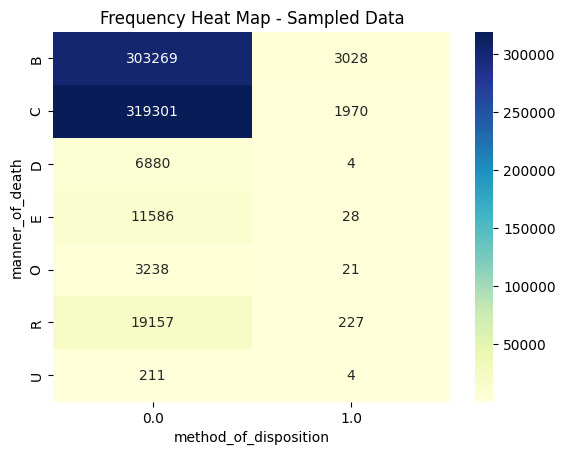

In [382]:
# Create a heat map
sns.heatmap(method_of_disposition_manner_of_death_crosstab2, annot=True, cmap='YlGnBu', fmt='d')

plt.title("Frequency Heat Map - Sampled Data")
plt.xlabel("method_of_disposition")
plt.ylabel("manner_of_death")

plt.show()

autopsy and manner_of_death

In [383]:
# Create a cross-tabulation (crosstab) between autopsy and manner_of_death
autopsy_manner_of_death_crosstab2 = pd.crosstab(sampled_df['autopsy'], sampled_df['manner_of_death'])

# Print the cross-tabulation
print("Cross-Tabulation between autopsy and manner_of_death: Sampled")
print(autopsy_manner_of_death_crosstab2)

Cross-Tabulation between autopsy and manner_of_death: Sampled
manner_of_death     0.0   1.0
autopsy                      
N                571294    86
U                 42224   151
Y                 50124  5045


In [384]:
# Perform the chi-square test - autopsy and manner_of_death
chi2, p, dof, expected_autopsy2 = chi2_contingency(autopsy_manner_of_death_crosstab2)

# Print the results
print(f"Chi-Square Value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected_autopsy2)

Chi-Square Value: 53637.24308573943
P-value: 0.0
Degrees of Freedom: 2
Expected Frequencies:
[[5.66868233e+05 4.51176690e+03]
 [4.20403958e+04 3.34604155e+02]
 [5.47333711e+04 4.35628947e+02]]


race and manner_of_death

In [385]:
# Create a cross-tabulation (crosstab) between race and manner_of_death
race_manner_of_death_crosstab2 = pd.crosstab(sampled_df['race'], sampled_df['manner_of_death'])

# Print the cross-tabulation
print("Cross-Tabulation between race and manner_of_death: Sampled")
print(race_manner_of_death_crosstab2)

Cross-Tabulation between race and manner_of_death: Sampled
manner_of_death     0.0   1.0
race                         
1                572890  2428
2                 73843  2657
3                  4843   100
4                  2254    12
5                  1708     2
6                   182     1
7                  1749    12
18                 1830    14
28                  955     9
38                  119     4
48                  872    11
58                   85     2
68                 1545    22
78                  767     8


In [386]:
# Perform the chi-square test - race and manner_of_death
chi2, p, dof, expected_race2 = chi2_contingency(race_manner_of_death_crosstab2)

# Print the results
print(f"Chi-Square Value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected_race2)

Chi-Square Value: 8155.925147288926
P-value: 0.0
Degrees of Freedom: 13
Expected Frequencies:
[[5.70775138e+05 4.54286238e+03]
 [7.58959359e+04 6.04064139e+02]
 [4.90396877e+03 3.90312293e+01]
 [2.24810707e+03 1.78929325e+01]
 [1.69649739e+03 1.35026102e+01]
 [1.81554984e+02 1.44501618e+00]
 [1.74709468e+03 1.39053196e+01]
 [1.82943929e+03 1.45607094e+01]
 [9.56388002e+02 7.61199778e+00]
 [1.22028760e+02 9.71240380e-01]
 [8.76027600e+02 6.97240045e+00]
 [8.63130251e+01 6.86974903e-01]
 [1.55462656e+03 1.23734445e+01]
 [7.68880396e+02 6.11960402e+00]]


Multi Index Cross-Tabulation and Chi-Square

In [387]:
# Create a multivariate cross-tabulation (crosstab) between selected categorical variables
multi_index_crosstab = pd.crosstab(index=[sampled_df['education_2003_revision'], sampled_df['month_of_death'],
                                          sampled_df['sex'], sampled_df['place_of_death_and_decedents_status']],
                                   columns=sampled_df['manner_of_death'])

# Print the multi-index cross-tabulation
print("Multi-Index Cross-Tabulation:")
print(multi_index_crosstab)

Multi-Index Cross-Tabulation:
manner_of_death                                                                  0.0  \
education_2003_revision month_of_death sex place_of_death_and_decedents_status         
1.0                     1              F   1                                    1070   
                                           2                                     161   
                                           3                                      11   
                                           4                                     826   
                                           5                                     263   
...                                                                              ...   
9.0                     12             M   3                                      13   
                                           4                                     481   
                                           5                                      91   
  

In [388]:
# Perform the chi-square test - multi_index_crosstab2 - Sampled Data
chi2, p, dof, expected_EMSP = chi2_contingency(multi_index_crosstab)

# Print the results
print(f"Chi-Square Value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected_EMSP)

Chi-Square Value: 30849.985054621306
P-value: 0.0
Degrees of Freedom: 1618
Expected Frequencies:
[[1.06155100e+03 8.44900168e+00]
 [1.59728702e+02 1.27129838e+00]
 [1.09131411e+01 8.68588958e-02]
 ...
 [9.02814400e+01 7.18559956e-01]
 [2.75804839e+02 2.19516118e+00]
 [9.22656475e+01 7.34352482e-01]]


In [389]:
# Create a multivariate cross-tabulation (crosstab) between selected categorical variables and 'manner_of_death'
multi_index_crosstab2 = pd.crosstab(index=[sampled_df['marital_status'], sampled_df['day_of_week_of_death'],
                                          sampled_df['injury_at_work'], sampled_df['method_of_disposition']],
                                   columns=sampled_df['manner_of_death'])

# Print the multi-index cross-tabulation
print("Multi-Index Cross-Tabulation:")
print(multi_index_crosstab2)

Multi-Index Cross-Tabulation:
manner_of_death                                                            0.0  \
marital_status day_of_week_of_death injury_at_work method_of_disposition         
D              1                    N              B                       424   
                                                   C                      1073   
                                                   D                        10   
                                                   E                         5   
                                                   O                         4   
...                                                                        ...   
W              7                    Y              B                         5   
                                                   C                         3   
                                                   E                         1   
               9                    U              B                

In [390]:
# Perform the chi-square test - multi_index_crosstab2
chi2, p, dof, expected_MDIM = chi2_contingency(multi_index_crosstab2)

# Print the results
print(f"Chi-Square Value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected_MDIM)

Chi-Square Value: 84934.21397665949
P-value: 0.0
Degrees of Freedom: 566
Expected Frequencies:
[[4.58351926e+02 3.64807362e+00]
 [1.11909302e+03 8.90698495e+00]
 [9.92103737e+00 7.89626325e-02]
 ...
 [9.92103737e-01 7.89626325e-03]
 [9.92103737e-01 7.89626325e-03]
 [2.97631121e+00 2.36887898e-02]]


In [391]:
# Create a multivariate cross-tabulation (crosstab) between selected categorical variables and 'manner_of_death'
multi_index_crosstab3 = pd.crosstab(index=[sampled_df['autopsy'], sampled_df['race']],
                                   columns=sampled_df['manner_of_death'])

# Print the multi-index cross-tabulation
print("Multi-Index Cross-Tabulation:")
print(multi_index_crosstab3)

Multi-Index Cross-Tabulation:
manner_of_death     0.0   1.0
autopsy race                 
N       1        495776    64
        2         61100    17
        3          4088     4
        4          1994     0
        5          1531     0
        6           154     0
        7          1519     0
        18         1601     1
        28          780     0
        38           87     0
        48          752     0
        58           62     0
        68         1271     0
        78          579     0
U       1         36197    58
        2          5340    89
        3           176     2
        4            59     0
        5            73     0
        6             9     0
        7            64     0
        18           74     0
        28           53     1
        38            7     0
        48           35     1
        58            8     0
        68           83     0
        78           46     0
Y       1         40917  2306
        2          7403  2551
        3 

In [392]:
# Perform the chi-square test - multi_index_crosstab3
chi2, p, dof, expected_AR = chi2_contingency(multi_index_crosstab3)

# Print the results
print(f"Chi-Square Value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected_AR)

Chi-Square Value: 96690.42631434144
P-value: 0.0
Degrees of Freedom: 41
Expected Frequencies:
[[4.91924717e+05 3.91528317e+03]
 [6.06344041e+04 4.82595921e+02]
 [4.05968849e+03 3.23115092e+01]
 [1.97825485e+03 1.57451489e+01]
 [1.51891082e+03 1.20891790e+01]
 [1.52783975e+02 1.21602454e+00]
 [1.50700558e+03 1.19944239e+01]
 [1.58935019e+03 1.26498137e+01]
 [7.73840915e+02 6.15908534e+00]
 [8.63130251e+01 6.86974903e-01]
 [7.46062010e+02 5.93798997e+00]
 [6.15104317e+01 4.89568322e-01]
 [1.26096385e+03 1.00361506e+01]
 [5.74428064e+02 4.57193642e+00]
 [3.59687210e+04 2.86279024e+02]
 [5.38613119e+03 4.28688132e+01]
 [1.76594465e+02 1.40553486e+00]
 [5.85341205e+01 4.65879532e-01]
 [7.24235728e+01 5.76427217e-01]
 [8.92893363e+00 7.10663693e-02]
 [6.34946392e+01 5.05360848e-01]
 [7.34156765e+01 5.84323481e-01]
 [5.35736018e+01 4.26398216e-01]
 [6.94472616e+00 5.52738428e-02]
 [3.57157345e+01 2.84265477e-01]
 [7.93682989e+00 6.31701060e-02]
 [8.23446102e+01 6.55389850e-01]
 [4.56367719e+0

##### 5.1.2 Cramer's V

In [393]:
# Convert the categorical data to numerical labels (optional if already numeric)
for column in sampled_df.columns:
    sampled_df[column] = pd.Categorical(sampled_df[column]).codes

# Calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Create a contingency table for the two categorical variables
confusion_matrix = pd.crosstab(sampled_df['manner_of_death'], sampled_df['detail_age'])

# Calculate Cramér's V
cramers_v_value = cramers_v(confusion_matrix)
print("Cramér's V:", cramers_v_value)

Cramér's V: 0.2828737726124689


In [394]:
# Calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Create a contingency table for the two categorical variables
confusion_matrix = pd.crosstab(sampled_df['manner_of_death'], sampled_df['race'])

# Calculate Cramér's V
cramers_v_value = cramers_v(confusion_matrix)
print("Cramér's V:", cramers_v_value)

Cramér's V: 0.11033216910124179


In [395]:
# Calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Create a contingency table for the two categorical variables
confusion_matrix = pd.crosstab(sampled_df['manner_of_death'], sampled_df['sex'])

# Calculate Cramér's V
cramers_v_value = cramers_v(confusion_matrix)
print("Cramér's V:", cramers_v_value)

Cramér's V: 0.05365735636614892


In [396]:
# Calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Create a contingency table for the two categorical variables
confusion_matrix = pd.crosstab(sampled_df['manner_of_death'], sampled_df['autopsy'])

# Calculate Cramér's V
cramers_v_value = cramers_v(confusion_matrix)
print("Cramér's V:", cramers_v_value)

Cramér's V: 0.2831633633967261


In [397]:
# Calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Create a contingency table for the two categorical variables
confusion_matrix = pd.crosstab(sampled_df['manner_of_death'], sampled_df['marital_status'])

# Calculate Cramér's V
cramers_v_value = cramers_v(confusion_matrix)
print("Cramér's V:", cramers_v_value)

Cramér's V: 0.14284899262170828


In [398]:
# Calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Create a contingency table for the two categorical variables
confusion_matrix = pd.crosstab(sampled_df['manner_of_death'], sampled_df['month_of_death'])

# Calculate Cramér's V
cramers_v_value = cramers_v(confusion_matrix)
print("Cramér's V:", cramers_v_value)

Cramér's V: 0.011717211899741894


In [399]:
# Calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Create a contingency table for the two categorical variables
confusion_matrix = pd.crosstab(sampled_df['manner_of_death'], sampled_df['education_2003_revision'])

# Calculate Cramér's V
cramers_v_value = cramers_v(confusion_matrix)
print("Cramér's V:", cramers_v_value)

Cramér's V: 0.05172162908281546


In [400]:
# Calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Create a contingency table for the two categorical variables
confusion_matrix = pd.crosstab(sampled_df['manner_of_death'], sampled_df['day_of_week_of_death'])

# Calculate Cramér's V
cramers_v_value = cramers_v(confusion_matrix)
print("Cramér's V:", cramers_v_value)

Cramér's V: 0.009621370740608245


In [401]:
# Calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Create a contingency table for the two categorical variables
confusion_matrix = pd.crosstab(sampled_df['manner_of_death'], sampled_df['injury_at_work'])

# Calculate Cramér's V
cramers_v_value = cramers_v(confusion_matrix)
print("Cramér's V:", cramers_v_value)

Cramér's V: 0.26481624284605926


In [402]:
# Calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Create a contingency table for the two categorical variables
confusion_matrix = pd.crosstab(sampled_df['manner_of_death'], sampled_df['method_of_disposition'])

# Calculate Cramér's V
cramers_v_value = cramers_v(confusion_matrix)
print("Cramér's V:", cramers_v_value)

Cramér's V: 0.024699637193449663


In [403]:
# Calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Create a contingency table for the two categorical variables
confusion_matrix = pd.crosstab(sampled_df['manner_of_death'], sampled_df['injury_at_work'])

# Calculate Cramér's V
cramers_v_value = cramers_v(confusion_matrix)
print("Cramér's V:", cramers_v_value)

Cramér's V: 0.26481624284605926


## 6. Modeling - Artifical Neural Networks

#### 6.1 ANN Models WITHOUT Data Rebalance

In [404]:
# select features for model
selected_features = [col for col in encoded_df.columns if col != 'manner_of_death']

target_variable = 'manner_of_death'

In [405]:
# select X and y variables
X = encoded_df[selected_features]
y = encoded_df[target_variable]

In [406]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##### 6.1.1 Basic ANN Model withOUT Hidden Layers

In [407]:
# build the ANN model
model_nolay = keras.Sequential([
    layers.Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],))
])

# compile the model
model_nolay.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [408]:
# train the model
model_nolay.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
14633/14633 [==============================] - 22s 1ms/step - loss: 0.0305 - accuracy: 0.9918
Epoch 2/10
14633/14633 [==============================] - 20s 1ms/step - loss: 0.0195 - accuracy: 0.9933
Epoch 3/10
14633/14633 [==============================] - 20s 1ms/step - loss: 0.0194 - accuracy: 0.9934
Epoch 4/10
14633/14633 [==============================] - 20s 1ms/step - loss: 0.0193 - accuracy: 0.9934
Epoch 5/10
14633/14633 [==============================] - 20s 1ms/step - loss: 0.0193 - accuracy: 0.9934
Epoch 6/10
14633/14633 [==============================] - 20s 1ms/step - loss: 0.0193 - accuracy: 0.9933
Epoch 7/10
14633/14633 [==============================] - 20s 1ms/step - loss: 0.0193 - accuracy: 0.9934
Epoch 8/10
14633/14633 [==============================] - 20s 1ms/step - loss: 0.0193 - accuracy: 0.9934
Epoch 9/10
14633/14633 [==============================] - 20s 1ms/step - loss: 0.0193 - accuracy: 0.9934
Epoch 10/10
14633/14633 [==============================

In [409]:
# evaluate the model
loss_nolay, accuracy_nolay = model_nolay.evaluate(X_test, y_test)
print(f"Test accuracy (Model_nolay): {accuracy_nolay}")

6272/6272 [==============================] - 7s 1ms/step - loss: 0.0204 - accuracy: 0.9931
Test accuracy (Model_nolay): 0.9930635094642639


##### 6.1.2 Basic ANN Model with Hidden Layers

In [410]:
# build the ANN model --> 3 hidden layers, 64 neurons on 1st, 32 neurons on 2nd, and 1 output neuron on last
model_lay = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_lay.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [411]:
# train the ANN model
model_lay.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
14633/14633 [==============================] - 25s 2ms/step - loss: 0.0205 - accuracy: 0.9932
Epoch 2/10
14633/14633 [==============================] - 24s 2ms/step - loss: 0.0191 - accuracy: 0.9934
Epoch 3/10
14633/14633 [==============================] - 24s 2ms/step - loss: 0.0188 - accuracy: 0.9934
Epoch 4/10
14633/14633 [==============================] - 24s 2ms/step - loss: 0.0186 - accuracy: 0.9934
Epoch 5/10
14633/14633 [==============================] - 24s 2ms/step - loss: 0.0185 - accuracy: 0.9935
Epoch 6/10
14633/14633 [==============================] - 24s 2ms/step - loss: 0.0183 - accuracy: 0.9935
Epoch 7/10
14633/14633 [==============================] - 24s 2ms/step - loss: 0.0182 - accuracy: 0.9936
Epoch 8/10
14633/14633 [==============================] - 25s 2ms/step - loss: 0.0181 - accuracy: 0.9936
Epoch 9/10
14633/14633 [==============================] - 25s 2ms/step - loss: 0.0179 - accuracy: 0.9937
Epoch 10/10
14633/14633 [==============================

In [ ]:
# evaluate the model
loss_lay, accuracy_lay = model_lay.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy_lay}")

In [ ]:
# visualize the ANN model
def visualize_model(model_lay):
    G = nx.DiGraph()
    node_labels = {}
    for i, layer in enumerate(model_lay.layers):
        layer_name = f'{layer.name}\n{layer.output_shape}'
        node_labels[i] = layer_name
        G.add_node(layer_name)
        if i > 0:
            G.add_edge(node_labels[i - 1], layer_name)

    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=10, font_weight='bold')
    plt.title("Neural Network Model Architecture")
    plt.savefig('model_visualization.png', format='png', dpi=300, bbox_inches='tight')
    plt.show()

# Call the function to visualize the model
visualize_model(model_lay)

##### 6.1.3 ANN Model w/ Reduced Complexity (Reduced amount of hidden layers)

In [412]:
# build model with reduced complexity --> 3 hidden layers, 32 neurons on 1st, 16 neurons on 2nd, and 1 output neuron on last
model_red = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# compile the model
model_red.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [413]:
# train the model with reduced complexity
model_red.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
14633/14633 [==============================] - 25s 2ms/step - loss: 0.0214 - accuracy: 0.9928
Epoch 2/10
14633/14633 [==============================] - 24s 2ms/step - loss: 0.0191 - accuracy: 0.9933
Epoch 3/10
14633/14633 [==============================] - 24s 2ms/step - loss: 0.0188 - accuracy: 0.9934
Epoch 4/10
14633/14633 [==============================] - 26s 2ms/step - loss: 0.0187 - accuracy: 0.9935
Epoch 5/10
14633/14633 [==============================] - 24s 2ms/step - loss: 0.0185 - accuracy: 0.9935
Epoch 6/10
14633/14633 [==============================] - 24s 2ms/step - loss: 0.0184 - accuracy: 0.9936
Epoch 7/10
14633/14633 [==============================] - 24s 2ms/step - loss: 0.0183 - accuracy: 0.9936
Epoch 8/10
14633/14633 [==============================] - 24s 2ms/step - loss: 0.0182 - accuracy: 0.9936
Epoch 9/10
14633/14633 [==============================] - 24s 2ms/step - loss: 0.0182 - accuracy: 0.9936
Epoch 10/10
14633/14633 [==============================

In [ ]:
# evaluate the model with reduced complexity
loss_red, accuracy_red = model_red.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy_red}")

In [ ]:
# visualize model with reduced complexity
def visualize_model(model_red):
    G = nx.DiGraph()
    node_labels = {}
    for i, layer in enumerate(model_red.layers):
        layer_name = f'{layer.name}\n{layer.output_shape}'
        node_labels[i] = layer_name
        G.add_node(layer_name)
        if i > 0:
            G.add_edge(node_labels[i - 1], layer_name)

    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=10, font_weight='bold')
    plt.title("Neural Network Model Architecture (Reduced Complexity)")
    plt.savefig('model_red_visualization.png', format='png', dpi=300, bbox_inches='tight')
    plt.show()

# call function to visualize
visualize_model(model_red)

##### 6.1.4 ANN Model with Regularization

In [ ]:
# build ANN the model with minimal hidden layers and dropout regularization (discussed in textbook)
model_reg = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),  # Dropout layer with 20% dropout rate
    layers.Dense(1, activation='sigmoid')  # Binary classification, hence using 'sigmoid'
])

# Compile the model
model_reg.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# train model
model_reg.fit(X_train, y_train, epochs=10, batch_size=32)

In [414]:
# evaluate model
loss_reg, accuracy_reg = model_reg.evaluate(X_test, y_test)
print(f"Test accuracy (Model_reg): {accuracy_reg}")

6272/6272 [==============================] - 8s 1ms/step - loss: 0.0199 - accuracy: 0.9931
Test accuracy (Model_reg): 0.9931333065032959


In [ ]:
# visualize model with dropout reg
def visualize_model(model):
    G = nx.DiGraph()
    node_labels = {}
    for i, layer in enumerate(model.layers):
        layer_name = f'{layer.name}\n{layer.output_shape}'
        node_labels[i] = layer_name
        G.add_node(layer_name)
        if i > 0:
            G.add_edge(node_labels[i - 1], layer_name)

    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=10, font_weight='bold')
    plt.title("Neural Network Model Architecture (Model_reg)")
    plt.savefig('model_reg_visualization.png', format='png', dpi=300, bbox_inches='tight')
    plt.show()

# call function to visualize
visualize_model(model_reg)

#### 6.2 ANN Models WITH Data Rebalance

In [ ]:
# select features for model
selected_features = [col for col in encoded_df_rebal.columns if col != 'manner_of_death']

target_variable = 'manner_of_death'

In [ ]:
# select X and y variables
X_rebal = encoded_df_rebal[selected_features]
y_rebal = encoded_df_rebal[target_variable]

In [ ]:
# split data
X_train_rebal, X_test_rebal, y_train_rebal, y_test_rebal = train_test_split(X_rebal, y_rebal, test_size=0.3, random_state=42)

##### 6.2.1 Basic ANN Model withOUT Hidden Layers

In [415]:
# build the ANN model
model_nolay_rebal = keras.Sequential([
    layers.Dense(1, activation='sigmoid', input_shape=(X_train_rebal.shape[1],))
])

# compile the model
model_nolay_rebal.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [416]:
# train the model
model_nolay_rebal.fit(X_train_rebal, y_train_rebal, epochs=10, batch_size=32)

Epoch 1/10
249/249 [==============================] - 1s 1ms/step - loss: 0.3823 - accuracy: 0.8654
Epoch 2/10
249/249 [==============================] - 0s 1ms/step - loss: 0.2400 - accuracy: 0.9108
Epoch 3/10
249/249 [==============================] - 0s 1ms/step - loss: 0.1808 - accuracy: 0.9531
Epoch 4/10
249/249 [==============================] - 0s 1ms/step - loss: 0.1482 - accuracy: 0.9638
Epoch 5/10
249/249 [==============================] - 0s 1ms/step - loss: 0.1280 - accuracy: 0.9679
Epoch 6/10
249/249 [==============================] - 0s 1ms/step - loss: 0.1145 - accuracy: 0.9689
Epoch 7/10
249/249 [==============================] - 0s 1ms/step - loss: 0.1049 - accuracy: 0.9732
Epoch 8/10
249/249 [==============================] - 0s 1ms/step - loss: 0.0978 - accuracy: 0.9791
Epoch 9/10
249/249 [==============================] - 0s 1ms/step - loss: 0.0922 - accuracy: 0.9798
Epoch 10/10
249/249 [==============================] - 0s 1ms/step - loss: 0.0879 - accuracy: 0.9805

In [417]:
# evaluate the model
loss_nolay_rebal, accuracy_nolay_rebal = model_nolay_rebal.evaluate(X_test_rebal, y_test_rebal)
print(f"Test accuracy (Model_nolay): {accuracy_nolay_rebal}")

107/107 [==============================] - 0s 1ms/step - loss: 0.0805 - accuracy: 0.9830
Test accuracy (Model_nolay): 0.9829862117767334


##### 6.2.2 Basic ANN Model with Hidden Layers

In [418]:
# build the ANN model --> 3 hidden layers, 64 neurons on 1st, 32 neurons on 2nd, and 1 output neuron on last
model_lay_rebal = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_rebal.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_lay_rebal.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [419]:
# train the ANN model
model_lay_rebal.fit(X_train_rebal, y_train_rebal, epochs=10, batch_size=32)

Epoch 1/10
249/249 [==============================] - 1s 2ms/step - loss: 0.1416 - accuracy: 0.9453
Epoch 2/10
249/249 [==============================] - 0s 2ms/step - loss: 0.0507 - accuracy: 0.9850
Epoch 3/10
249/249 [==============================] - 0s 2ms/step - loss: 0.0368 - accuracy: 0.9897
Epoch 4/10
249/249 [==============================] - 0s 2ms/step - loss: 0.0262 - accuracy: 0.9923
Epoch 5/10
249/249 [==============================] - 0s 2ms/step - loss: 0.0190 - accuracy: 0.9952
Epoch 6/10
249/249 [==============================] - 0s 2ms/step - loss: 0.0126 - accuracy: 0.9971
Epoch 7/10
249/249 [==============================] - 0s 2ms/step - loss: 0.0090 - accuracy: 0.9979
Epoch 8/10
249/249 [==============================] - 0s 2ms/step - loss: 0.0059 - accuracy: 0.9990
Epoch 9/10
249/249 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 0.9992
Epoch 10/10
249/249 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 0.9995

In [420]:
# evaluate the model
loss_lay_rebal, accuracy_lay_rebal = model_lay_rebal.evaluate(X_test_rebal, y_test_rebal)
print(f"Test accuracy: {accuracy_lay_rebal}")

107/107 [==============================] - 0s 1ms/step - loss: 0.0170 - accuracy: 0.9950
Test accuracy: 0.9950131773948669


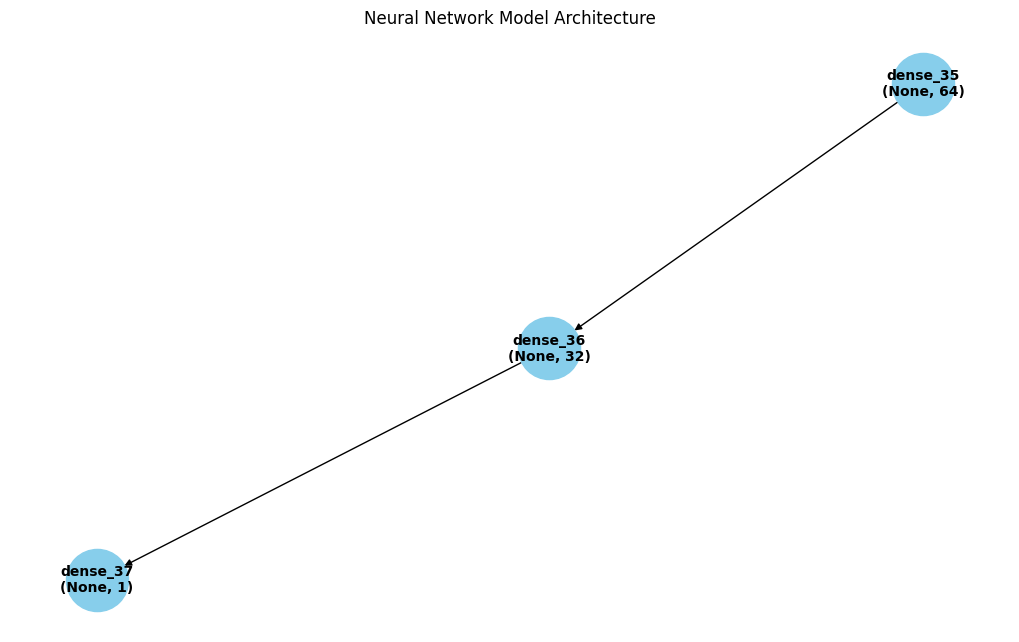

In [421]:
# visualize the ANN model
def visualize_model(model_lay_rebal):
    G = nx.DiGraph()
    node_labels = {}
    for i, layer in enumerate(model_lay_rebal.layers):
        layer_name = f'{layer.name}\n{layer.output_shape}'
        node_labels[i] = layer_name
        G.add_node(layer_name)
        if i > 0:
            G.add_edge(node_labels[i - 1], layer_name)

    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=10, font_weight='bold')
    plt.title("Neural Network Model Architecture")
    plt.savefig('model_visualization.png', format='png', dpi=300, bbox_inches='tight')
    plt.show()

# Call the function to visualize the model
visualize_model(model_lay_rebal)

##### 6.2.3 ANN Model w/ Reduced Complexity (Reduced amount of hidden layers)

In [422]:
# build model with reduced complexity --> 3 hidden layers, 32 neurons on 1st, 16 neurons on 2nd, and 1 output neuron on last
model_red_rebal = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train_rebal.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# compile the model
model_red_rebal.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [423]:
# train the model with reduced complexity
model_red_rebal.fit(X_train_rebal, y_train_rebal, epochs=10, batch_size=32)

Epoch 1/10
249/249 [==============================] - 2s 2ms/step - loss: 0.1822 - accuracy: 0.9253
Epoch 2/10
249/249 [==============================] - 0s 2ms/step - loss: 0.0588 - accuracy: 0.9824
Epoch 3/10
249/249 [==============================] - 0s 2ms/step - loss: 0.0464 - accuracy: 0.9865
Epoch 4/10
249/249 [==============================] - 0s 2ms/step - loss: 0.0392 - accuracy: 0.9874
Epoch 5/10
249/249 [==============================] - 0s 2ms/step - loss: 0.0328 - accuracy: 0.9911
Epoch 6/10
249/249 [==============================] - 0s 2ms/step - loss: 0.0273 - accuracy: 0.9928
Epoch 7/10
249/249 [==============================] - 0s 2ms/step - loss: 0.0232 - accuracy: 0.9935
Epoch 8/10
249/249 [==============================] - 0s 2ms/step - loss: 0.0192 - accuracy: 0.9950
Epoch 9/10
249/249 [==============================] - 0s 2ms/step - loss: 0.0152 - accuracy: 0.9962
Epoch 10/10
249/249 [==============================] - 0s 2ms/step - loss: 0.0120 - accuracy: 0.9974

In [424]:
# evaluate the model with reduced complexity
loss_red_rebal, accuracy_red_rebal = model_red_rebal.evaluate(X_test_rebal, y_test_rebal)
print(f"Test accuracy: {accuracy_red_rebal}")

107/107 [==============================] - 0s 1ms/step - loss: 0.0176 - accuracy: 0.9941
Test accuracy: 0.9941331744194031


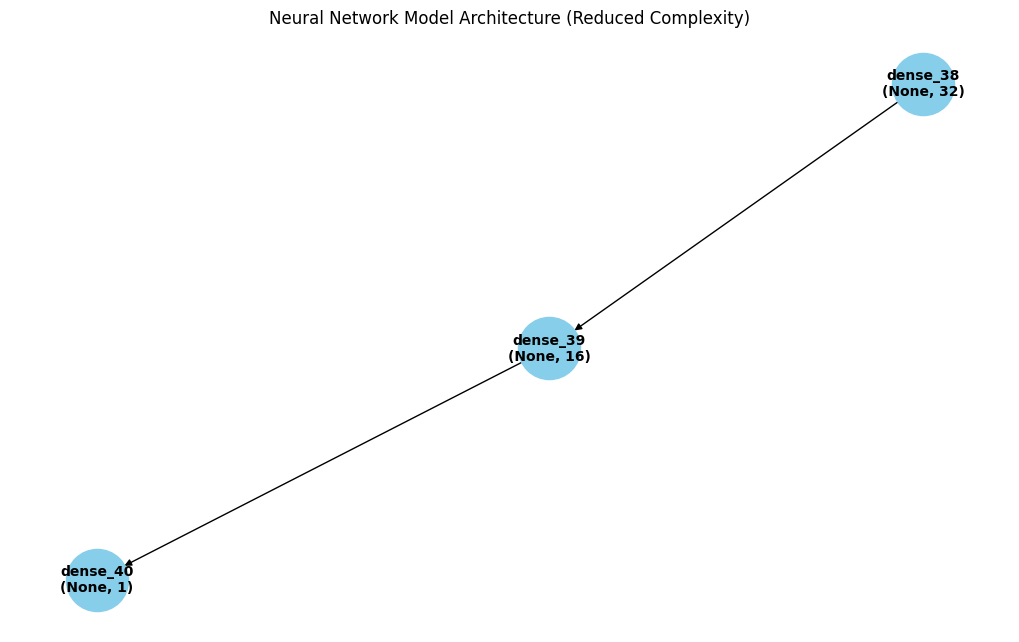

In [425]:
# visualize model with reduced complexity
def visualize_model(model_red_rebal):
    G = nx.DiGraph()
    node_labels = {}
    for i, layer in enumerate(model_red_rebal.layers):
        layer_name = f'{layer.name}\n{layer.output_shape}'
        node_labels[i] = layer_name
        G.add_node(layer_name)
        if i > 0:
            G.add_edge(node_labels[i - 1], layer_name)

    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=10, font_weight='bold')
    plt.title("Neural Network Model Architecture (Reduced Complexity)")
    plt.savefig('model_red_visualization.png', format='png', dpi=300, bbox_inches='tight')
    plt.show()

# call function to visualize
visualize_model(model_red_rebal)

##### 6.2.4 ANN Model with Regularization

In [426]:
# build ANN the model with minimal hidden layers and dropout regularization (discussed in textbook)
model_reg_rebal = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(X_train_rebal.shape[1],)),
    Dropout(0.2),  # Dropout layer with 20% dropout rate
    layers.Dense(1, activation='sigmoid')  # Binary classification, hence using 'sigmoid'
])

# Compile the model
model_reg_rebal.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [427]:
# train model
model_reg_rebal.fit(X_train_rebal, y_train_rebal, epochs=10, batch_size=32)

Epoch 1/10
249/249 [==============================] - 1s 2ms/step - loss: 0.2852 - accuracy: 0.8692
Epoch 2/10
249/249 [==============================] - 0s 2ms/step - loss: 0.0898 - accuracy: 0.9725
Epoch 3/10
249/249 [==============================] - 0s 2ms/step - loss: 0.0729 - accuracy: 0.9764
Epoch 4/10
249/249 [==============================] - 1s 2ms/step - loss: 0.0656 - accuracy: 0.9798
Epoch 5/10
249/249 [==============================] - 1s 2ms/step - loss: 0.0609 - accuracy: 0.9819
Epoch 6/10
249/249 [==============================] - 1s 2ms/step - loss: 0.0566 - accuracy: 0.9845
Epoch 7/10
249/249 [==============================] - 0s 2ms/step - loss: 0.0524 - accuracy: 0.9848
Epoch 8/10
249/249 [==============================] - 0s 2ms/step - loss: 0.0499 - accuracy: 0.9848
Epoch 9/10
249/249 [==============================] - 0s 2ms/step - loss: 0.0471 - accuracy: 0.9867
Epoch 10/10
249/249 [==============================] - 0s 2ms/step - loss: 0.0459 - accuracy: 0.9868

In [428]:
# evaluate model
loss_reg_rebal, accuracy_reg_rebal = model_reg_rebal.evaluate(X_test_rebal, y_test_rebal)
print(f"Test accuracy (Model_reg): {accuracy_reg_rebal}")

107/107 [==============================] - 0s 1ms/step - loss: 0.0394 - accuracy: 0.9889
Test accuracy (Model_reg): 0.9888530373573303


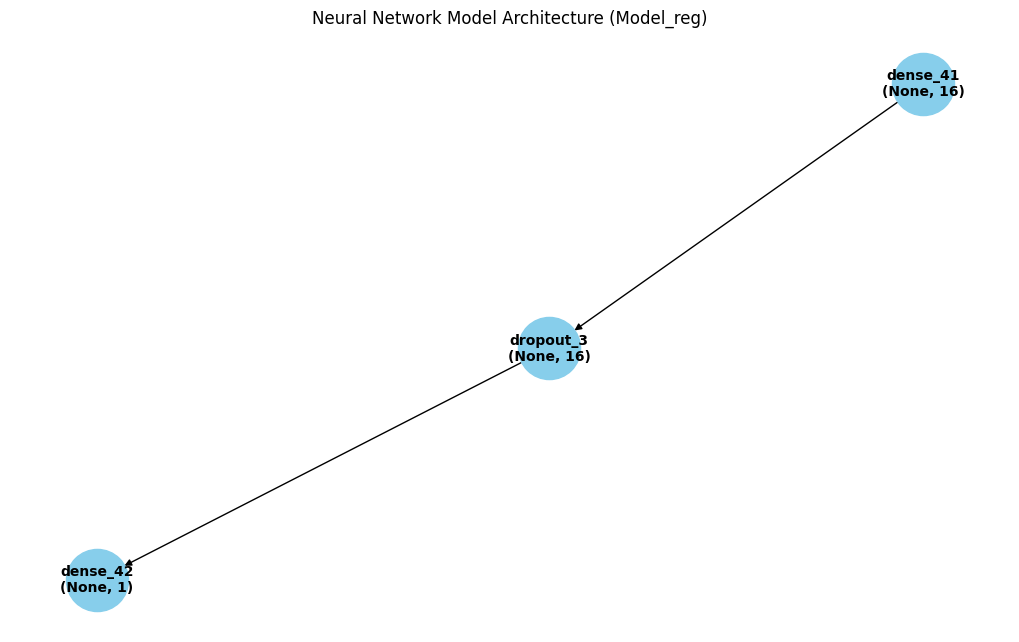

In [429]:
# visualize model with dropout reg
def visualize_model(model_reg_rebal):
    G = nx.DiGraph()
    node_labels = {}
    for i, layer in enumerate(model_reg_rebal.layers):
        layer_name = f'{layer.name}\n{layer.output_shape}'
        node_labels[i] = layer_name
        G.add_node(layer_name)
        if i > 0:
            G.add_edge(node_labels[i - 1], layer_name)

    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=10, font_weight='bold')
    plt.title("Neural Network Model Architecture (Model_reg)")
    plt.savefig('model_reg_visualization.png', format='png', dpi=300, bbox_inches='tight')
    plt.show()

# call function to visualize
visualize_model(model_reg_rebal)

In [430]:
# Predict probabilities for test set
y_probs_reg_rebal = model_reg_rebal.predict(X_test_rebal)

# Convert probabilities to binary predictions (0 or 1) using a threshold (e.g., 0.5)
y_pred_reg_rebal = np.round(y_probs_reg_rebal)

# Calculate precision score
precision_reg_rebal = precision_score(y_test_rebal, y_pred_reg_rebal, average=None)

# Print precision score for positive class (class 1)
print(f"Precision for positive class (Model_reg): {precision_reg_rebal[1]}")

107/107 [==============================] - 0s 1ms/step
Precision for positive class (Model_reg): 0.9455587392550143


#### 6.3 Model Performance Evaluation Summaries

##### 6.3.1 Loss & Accuracy Scores

In [431]:
# model eval values for NON-REBALANCED models
eval_results = {
    'Model': ['Model_nolay', 'Model_lay', 'Model_red', 'Model_reg'],
    'Test Loss': [loss_nolay, loss_lay, loss_red, loss_reg],
    'Test Accuracy': [accuracy_nolay, accuracy_lay, accuracy_red, accuracy_reg]
}

# create DataFrame for eval results
eval_df = pd.DataFrame(eval_results)

# Display the table
print(eval_df)


         Model  Test Loss  Test Accuracy
0  Model_nolay   0.020371       0.993064
1    Model_lay   0.020877       0.993004
2    Model_red   0.019905       0.993168
3    Model_reg   0.019875       0.993133


In [432]:
# model eval values for REBALANCED models
eval_results_rebal = {
    'Model': ['Model_nolay_rebal', 'Model_lay_rebal', 'Model_red_rebal', 'Model_reg_rebal'],
    'Test Loss': [loss_nolay_rebal, loss_lay_rebal, loss_red_rebal, loss_reg_rebal],
    'Test Accuracy': [accuracy_nolay_rebal, accuracy_lay_rebal, accuracy_red_rebal, accuracy_reg_rebal]
}

# create DataFrame for eval results
eval_df_rebal = pd.DataFrame(eval_results_rebal)

# Display the table
print(eval_df_rebal)

               Model  Test Loss  Test Accuracy
0  Model_nolay_rebal   0.080522       0.982986
1    Model_lay_rebal   0.017044       0.995013
2    Model_red_rebal   0.017573       0.994133
3    Model_reg_rebal   0.039388       0.988853


##### 6.3.2 Precision Scores

In [433]:
 # create precision scores for NON-REBALANCED models
models = [model_nolay, model_lay, model_red, model_reg]
model_names = ['model_nolay', 'model_lay', 'model_red', 'model_reg']

precision_scores = {}

for model, name in zip(models, model_names):
    # Predict probabilities for test set
    y_probs = model.predict(X_test)

    # Convert probabilities to binary predictions (0 or 1) using a threshold (e.g., 0.5)
    y_pred = np.round(y_probs)

    # Calculate precision score
    precision = precision_score(y_test, y_pred, average=None)

    # Store precision scores in the dictionary with titles
    precision_scores[name] = {
        "Negative Class": round(precision[0], 6),
        "Positive Class": round(precision[1], 6)
    }

# Print precision scores for each model along with titles for each class
for name, scores in precision_scores.items():
    print(f"Precision scores for {name}:")
    print(f"  Negative Class: {scores['Negative Class']}")
    print(f"  Positive Class: {scores['Positive Class']}")

6272/6272 [==============================] - 7s 1ms/step
Precision scores for model_nolay:
  Negative Class: 0.994481
  Positive Class: 0.648418
Precision scores for model_lay:
  Negative Class: 0.994382
  Positive Class: 0.645283
Precision scores for model_red:
  Negative Class: 0.994086
  Positive Class: 0.712264
Precision scores for model_reg:
  Negative Class: 0.994249
  Positive Class: 0.680672


In [434]:
 # create precision scores for REBALANCED models
models_rebal = [model_nolay_rebal, model_lay_rebal, model_red_rebal, model_reg_rebal]
model_names_rebal = ['model_nolay_rebal', 'model_lay_rebal', 'model_red_rebal', 'model_reg_rebal']

precision_scores_rebal = {}

for model, name in zip(models_rebal, model_names_rebal):
    # Predict probabilities for test set
    y_probs_rebal = model.predict(X_test_rebal)

    # Convert probabilities to binary predictions (0 or 1) using a threshold (e.g., 0.5)
    y_pred_rebal = np.round(y_probs_rebal)

    # Calculate precision score
    precision_rebal = precision_score(y_test_rebal, y_pred_rebal, average=None)

    # Store precision scores in the dictionary with titles
    precision_scores_rebal[name] = {
        "Negative Class": round(precision_rebal[0], 6),
        "Positive Class": round(precision_rebal[1], 6)
    }

# Print precision scores for each model along with titles for each class
for name, scores in precision_scores_rebal.items():
    print(f"Precision scores for {name}:")
    print(f"  Negative Class: {scores['Negative Class']}")
    print(f"  Positive Class: {scores['Positive Class']}")

107/107 [==============================] - 0s 1ms/step
Precision scores for model_nolay_rebal:
  Negative Class: 1.0
  Positive Class: 0.91922
Precision scores for model_lay_rebal:
  Negative Class: 1.0
  Positive Class: 0.974889
Precision scores for model_red_rebal:
  Negative Class: 1.0
  Positive Class: 0.970588
Precision scores for model_reg_rebal:
  Negative Class: 1.0
  Positive Class: 0.945559


##### 6.3.3 Recall Scores

In [435]:
 # create recall scores for NON-REBALANCED models
models = [model_nolay, model_lay, model_red, model_reg]
model_names = ['model_nolay', 'model_lay', 'model_red', 'model_reg']

recall_scores = {}

for model, name in zip(models, model_names):
    # Predict probabilities for test set
    y_probs = model.predict(X_test)

    # Convert probabilities to binary predictions (0 or 1) using a threshold (e.g., 0.5)
    y_pred = np.round(y_probs)

    # Calculate recall score
    recall = recall_score(y_test, y_pred, average=None)

    # Store recall scores in the dictionary with titles
    recall_scores[name] = {
        "Negative Class": round(recall[0], 6),
        "Positive Class": round(recall[1], 6)
    }

# Print recall scores for each model along with titles for each class
for name, scores in recall_scores.items():
    print(f"Recall scores for {name}:")
    print(f"  Negative Class: {scores['Negative Class']}")
    print(f"  Positive Class: {scores['Positive Class']}")

6272/6272 [==============================] - 7s 1ms/step
Recall scores for model_nolay:
  Negative Class: 0.998548
  Positive Class: 0.325795
Recall scores for model_lay:
  Negative Class: 0.998583
  Positive Class: 0.31357
Recall scores for model_red:
  Negative Class: 0.999081
  Positive Class: 0.276895
Recall scores for model_reg:
  Negative Class: 0.998855
  Positive Class: 0.297066


In [436]:
 # create recall scores for REBALANCED models
models_rebal = [model_nolay_rebal, model_lay_rebal, model_red_rebal, model_reg_rebal]
model_names_rebal = ['model_nolay_rebal', 'model_lay_rebal', 'model_red_rebal', 'model_reg_rebal']

recall_scores_rebal = {}

for model, name in zip(models_rebal, model_names_rebal):
    # Predict probabilities for test set
    y_probs_rebal = model.predict(X_test_rebal)

    # Convert probabilities to binary predictions (0 or 1) using a threshold (e.g., 0.5)
    y_pred_rebal = np.round(y_probs_rebal)

    # Calculate recall score
    recall_rebal = recall_score(y_test_rebal, y_pred_rebal, average=None)

    # Store recall scores in the dictionary with titles
    recall_scores_rebal[name] = {
        "Negative Class": round(recall_rebal[0], 6),
        "Positive Class": round(recall_rebal[1], 6)
    }

# Print recall scores for each model along with titles for each class
for name, scores in recall_scores_rebal.items():
    print(f"Recall scores for {name}:")
    print(f"  Negative Class: {scores['Negative Class']}")
    print(f"  Positive Class: {scores['Positive Class']}")

107/107 [==============================] - 0s 1ms/step
Recall scores for model_nolay_rebal:
  Negative Class: 0.978901
  Positive Class: 1.0
Recall scores for model_lay_rebal:
  Negative Class: 0.993816
  Positive Class: 1.0
Recall scores for model_red_rebal:
  Negative Class: 0.992725
  Positive Class: 1.0
Recall scores for model_reg_rebal:
  Negative Class: 0.986177
  Positive Class: 1.0


##### 6.3.4 F1 Scores

In [437]:
 # create F1 scores for NON-REBALANCED models
models = [model_nolay, model_lay, model_red, model_reg]
model_names = ['model_nolay', 'model_lay', 'model_red', 'model_reg']

F1_scores = {}

for model, name in zip(models, model_names):
    # Predict probabilities for test set
    y_probs = model.predict(X_test)

    # Convert probabilities to binary predictions (0 or 1) using a threshold (e.g., 0.5)
    y_pred = np.round(y_probs)

    # Calculate F1 score
    F1 = f1_score(y_test, y_pred, average=None)

    # Store F1 scores in the dictionary with titles
    F1_scores[name] = {
        "Negative Class": round(F1[0], 6),
        "Positive Class": round(F1[1], 6)
    }

# Print F1 scores for each model along with titles for each class
for name, scores in F1_scores.items():
    print(f"F1 scores for {name}:")
    print(f"  Negative Class: {scores['Negative Class']}")
    print(f"  Positive Class: {scores['Positive Class']}")

6272/6272 [==============================] - 7s 1ms/step
F1 scores for model_nolay:
  Negative Class: 0.99651
  Positive Class: 0.433686
F1 scores for model_lay:
  Negative Class: 0.996478
  Positive Class: 0.422049
F1 scores for model_red:
  Negative Class: 0.996577
  Positive Class: 0.398768
F1 scores for model_reg:
  Negative Class: 0.996546
  Positive Class: 0.413617


In [438]:
 # create F1 scores for REBALANCED models
models_rebal = [model_nolay_rebal, model_lay_rebal, model_red_rebal, model_reg_rebal]
model_names_rebal = ['model_nolay_rebal', 'model_lay_rebal', 'model_red_rebal', 'model_reg_rebal']

F1_scores_rebal = {}

for model, name in zip(models_rebal, model_names_rebal):
    # Predict probabilities for test set
    y_probs_rebal = model.predict(X_test_rebal)

    # Convert probabilities to binary predictions (0 or 1) using a threshold (e.g., 0.5)
    y_pred_rebal = np.round(y_probs_rebal)

    # Calculate F1 score
    F1_rebal = f1_score(y_test_rebal, y_pred_rebal, average=None)

    # Store F1 scores in the dictionary with titles
    F1_scores_rebal[name] = {
        "Negative Class": round(F1_rebal[0], 6),
        "Positive Class": round(F1_rebal[1], 6)
    }

# Print F1 scores for each model along with titles for each class
for name, scores in F1_scores_rebal.items():
    print(f"F1 scores for {name}:")
    print(f"  Negative Class: {scores['Negative Class']}")
    print(f"  Positive Class: {scores['Positive Class']}")

107/107 [==============================] - 0s 1ms/step
F1 scores for model_nolay_rebal:
  Negative Class: 0.989338
  Positive Class: 0.95791
F1 scores for model_lay_rebal:
  Negative Class: 0.996898
  Positive Class: 0.987285
F1 scores for model_red_rebal:
  Negative Class: 0.996349
  Positive Class: 0.985075
F1 scores for model_reg_rebal:
  Negative Class: 0.99304
  Positive Class: 0.972018


#### 6.4 AUC-ROC Curves

6272/6272 [==============================] - 6s 1ms/step


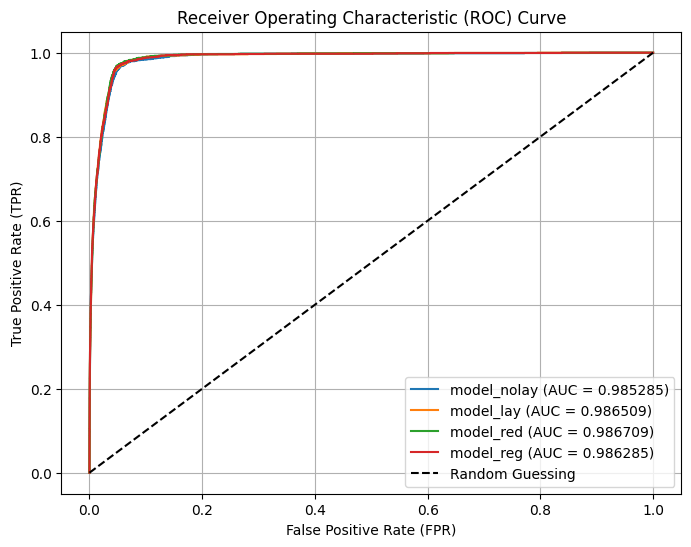

In [439]:
 # calculate and visualize AUC-ROC curve for NON-REBALANCED models
models = [model_nolay, model_lay, model_red, model_reg]
model_names = ['model_nolay', 'model_lay', 'model_red', 'model_reg']

# Plot ROC curve for each model
plt.figure(figsize=(8, 6))

for model, name in zip(models, model_names):
    # Get model predictions
    y_probs = model.predict(X_test)

    # Ensure y_probs is a 1D array (squeeze it if necessary)
    y_probs = np.squeeze(y_probs)

    # Calculate AUC score
    auc_score = roc_auc_score(y_test, y_probs)

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f"{name} (AUC = {round(auc_score, 6)})")

# Plot the diagonal line representing random guessing
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

107/107 [==============================] - 0s 1ms/step


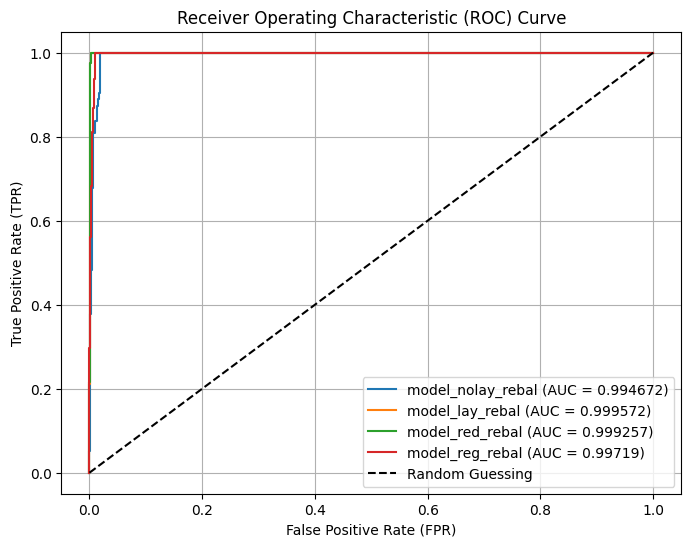

In [440]:
 # calculate and visualize AUC-ROC curve for REBALANCED models
models_rebal = [model_nolay_rebal, model_lay_rebal, model_red_rebal, model_reg_rebal]
model_names_rebal = ['model_nolay_rebal', 'model_lay_rebal', 'model_red_rebal', 'model_reg_rebal']

# Plot ROC curve for each model
plt.figure(figsize=(8, 6))

for model, name in zip(models_rebal, model_names_rebal):
    # Get model predictions
    y_probs_rebal = model.predict(X_test_rebal)

    # Ensure y_probs is a 1D array (squeeze it if necessary)
    y_probs_rebal = np.squeeze(y_probs_rebal)

    # Calculate AUC score
    auc_score = roc_auc_score(y_test_rebal, y_probs_rebal)

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test_rebal, y_probs_rebal)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f"{name} (AUC = {round(auc_score, 6)})")

# Plot the diagonal line representing random guessing
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()